# Poppy Universe – Star data Exploration

Welcome to the **Poppy Universe star data exploration notebook**!  
This notebook is the first step in turning raw Gaia data into our very own interstellar playground. Here, we’ll explore the stars, get to know their positions, colors, temperatures, luminosities, and more, and prepare the data for further analysis and visualization.

---

## Goals

1. **Understand the dataset**  
   - Inspect the number of stars, columns, and data types  
   - Identify missing values and duplicates

2. **Visualize distributions**  
   - Brightness (G, BP, RP bands)  
   - Colors and temperatures  
   - Distances, radii, masses, luminosities, and ages

3. **Examine relationships**  
   - HR diagram (BP-RP vs Teff)  
   - Luminosity vs Radius  
   - Proper motion vs distance

4. **Plan for further processing**  
   - Identify columns to keep/drop  
   - Flag stars for later clustering or Poppy Universe lore

---

## Folder & File References

- **Data/Stars/gaia_data.csv** → Original Gaia dataset

---

> Note: All analyses here use the **Gaia dataset**. Names of stars are not included at this stage; they will be added later if needed. For now, every star is identified by its Gaia `Source` ID.


## 0) Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
from datetime import datetime

In [2]:
# --- START TOTAL TIMER ---
total_start = time.time()

In [3]:
# =============================
# 🛠️ Preparation section
# =============================
prep_start = time.time()

## 1) Loading the dataset

In [4]:
prep_start = time.time()

In [5]:
Dataframe = pd.read_csv('../../Data/Stars/1_Start/dataGaia2.csv')

In [6]:
Dataframe.head()

Unnamed: 0    RA_ICRS    DE_ICRS             Source  e_RA_ICRS  e_DE_ICRS  \
0           0  44.589012   2.195298   1306361548360576     0.0655     0.0612   
1           1  35.358035   8.988813  23700286669971584     0.0658     0.0717   
2           2  44.450767  10.079118  27109837867995776     0.0627     0.0517   
3           3  48.404909  15.105912  31009771252186752     0.0500     0.0421   
4           4  57.092838  11.550927  36876009385300352     0.0521     0.0335   

      Plx   e_Plx     PM   pmRA  ...   Lum-Flame  Mass-Flame  Age-Flame  \
0  0.2384  0.0769  2.901  2.088  ...  298.485140         NaN        NaN   
1  0.1666  0.0785  4.402 -0.242  ...  292.672100         NaN        NaN   
2  0.3544  0.0727  3.154  2.722  ...  506.732800         NaN        NaN   
3  0.5962  0.0557  2.745  2.460  ...    9.055018         NaN        NaN   
4  0.4507  0.0575  4.918 -2.851  ...  311.502840         NaN        NaN   

    z-Flame  Evol  SpType-ELS  Flags-HS     EWHa   e_EWHa  f_EWHa  
0  1.507248   NaN     O              92  0.02128  0.19309       0  
1  1.332909   NaN     O              92  0.02144  0.17600       0  
2  1.582338   NaN     O              92  0.13726  0.13364       0  
3  1.561845   NaN     O              93  0.09470  0.10548       0  
4  1.521734   NaN     O              92  0.08682  0.07831       0  

[5 rows x 50 columns]

## 2) General info about the Dataframe

In [7]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

In [8]:
Dataframe.describe()

Unnamed: 0        RA_ICRS        DE_ICRS        Source  \
count  626016.000000  626016.000000  626016.000000  6.260160e+05   
mean    48462.184864     114.461886      27.758130  1.034965e+18   
std     29249.820619     103.594052      26.724066  1.373944e+18   
min         0.000000       0.000205     -89.098460  3.865554e+10   
25%     22357.000000      47.123816      18.999283  1.429009e+17   
50%     47831.500000      68.112694      31.444374  2.277695e+17   
75%     73915.250000     122.131857      43.771117  1.963946e+18   
max     99999.000000     359.998280      89.774031  6.916186e+18   

           e_RA_ICRS      e_DE_ICRS            Plx          e_Plx  \
count  626016.000000  626016.000000  626016.000000  626016.000000   
mean        0.026891       0.022999       1.466432       0.033111   
std         0.032805       0.029426       2.015173       0.040997   
min         0.004400       0.004900      -5.014100       0.008000   
25%         0.014900       0.012300       0.313100       0.018200   
50%         0.019600       0.015900       0.850400       0.023600   
75%         0.026600       0.022100       1.633600       0.032000   
max         0.801800       0.718500      95.047700       1.056500   

                  PM           pmRA  ...      Rad-Flame      Lum-Flame  \
count  626016.000000  626016.000000  ...  611293.000000  611293.000000   
mean       11.114728       1.332241  ...       6.850684     114.628554   
std        19.287210      15.950555  ...      17.021461     330.115307   
min         0.002000    -584.663000  ...       0.046300       0.034732   
25%         2.486000      -2.380000  ...       1.343500       2.066952   
50%         5.508000       0.059000  ...       2.017800      11.679550   
75%        10.857000       3.162000  ...       3.695100      60.254990   
max       688.189000     606.357000  ...     181.063300    3499.921000   

          Mass-Flame      Age-Flame        z-Flame           Evol  \
count  590796.000000  544681.000000  611293.000000  590797.000000   
mean        1.841872       3.776435       0.445233     364.190439   
std         1.004918       4.139873       0.233019     238.863381   
min         0.500000       0.200000       0.001505     100.000000   
25%         1.041000       0.524000       0.313836     216.000000   
50%         1.649000       1.448000       0.480814     286.000000   
75%         2.462000       6.629000       0.570397     457.000000   
max         7.521000      13.500000       1.616032    1735.000000   

            Flags-HS           EWHa         e_EWHa         f_EWHa  
count  626016.000000  626016.000000  626016.000000  626016.000000  
mean      126.373796       0.158441       0.037198       0.211773  
std       208.529314       0.227429       0.040021       0.408565  
min         1.000000      -6.651180       0.005400       0.000000  
25%        91.000000       0.045490       0.018830       0.000000  
50%        93.000000       0.147890       0.027910       0.000000  
75%        94.000000       0.301950       0.039490       0.000000  
max       999.000000       1.883830       3.296320       1.000000  

[8 rows x 49 columns]

### Dataset Overview

The Gaia dataset contains **626,016 rows** and **50 columns**, representing individual celestial objects observed by the Gaia mission.  
Most columns are numeric (`float64`), with a few integer and one categorical column (`SpType-ELS`), indicating the spectral type of each object.  

- **Non-null values:** Most features are fully populated, though some — like `GRVSmag`, `RV`, `Rad-Flame`, `Mass-Flame`, and `Age-Flame` — have missing values.  
- **Memory usage:** ~239 MB, which is quite large but still manageable for local analysis.  
- **Structure:** Includes key astrometric (RA, DE, Plx, PM), photometric (Gmag, BPmag, RPmag), and astrophysical parameters (Teff, Lum-Flame, Mass-Flame, etc.).  

🪐 In short, this is a rich, multi-dimensional dataset, perfect for exploring stellar properties, distributions, and relationships between physical characteristics.

---

### Descriptive Statistics

The summary below shows the general distribution of numeric values across all 50 columns:

- **Right Ascension (RA_ICRS)** ranges from ~0° to 360°, as expected for full-sky coverage.  
- **Declination (DE_ICRS)** spans from -89° to +89°, also confirming a wide celestial spread.  
- **Parallax (Plx)** varies between **-5.01** and **95.05 milliarcseconds**, which includes negative values due to measurement errors.  
- **Proper motion (PM, pmRA, pmDE)** shows a broad range up to **~688 mas/yr**, indicating both near and fast-moving stars.  
- **Luminosity (Lum-Flame)** and **Radius (Rad-Flame)** exhibit extreme ranges (up to thousands of solar units) showing the mix of dwarfs, giants, and possibly supergiants.  
- **Age (Age-Flame)** spans roughly **0.2–13.5 Gyr**, fitting well within stellar evolution expectations.  
- Some values (e.g. metallicity `[Fe/H]`, effective temperature `Teff`, and extinction factors `AG`, `ABP`, `ARP`) are statistically stable and ready for further exploration.

Overall, the data looks **well-distributed but complex**, with a few clear outliers worth investigating later (especially in parallax, luminosity, and motion).


In [9]:
prep_end = time.time()
prep_elapsed = prep_end - prep_start

## 3) Variable information

## Variable Selection & Complexity Assessment

Before diving into deeper analysis, it’s important to identify which variables are practical to keep and which might be too complex or unnecessary for the scope of this project.

### Variables Likely to Keep

These are relatively simple, interpretable, and directly useful for exploration and modeling:
- **Source** — unique identifier for each star (acts as the `id`).
- **RA_ICRS** & **DE_ICRS** — right ascension and declination (position on the celestial sphere).
- **Plx** — parallax, essential for distance estimation.
- **PM**, **pmRA**, **pmDE** — proper motion values (how stars move over time).
- **Gmag**, **BPmag**, **RPmag**, **GRVSmag** — magnitudes across different Gaia bands, key for brightness and color analysis.
- **logg**, **[Fe/H]**, **Teff** — stellar surface gravity, metallicity, and effective temperature (physical characteristics).
- **Dist** — distance in parsecs, derived from parallax.
- **E(BP-RP)** — color excess, helps correct for interstellar dust.
- **GMAG**, **Rad**, **Lum-Flame**, **Mass-Flame**, **Age-Flame** — intrinsic properties (radius, luminosity, mass, and estimated age).
- **SpType-ELS** — spectral type, simple categorical descriptor of star classification.

### Variables to Reconsider / Simplify

These might be valuable but could add too much complexity or redundancy early on:
- **e_RA_ICRS**, **e_DE_ICRS**, **e_Plx**, **e_pmRA**, **e_pmDE**, **e_Gmag**, **e_BPmag**, **e_RPmag**, **e_GRVSmag**, **e_EWHa** — all represent **measurement uncertainties**. Useful for precision analysis, but can be ignored in early exploration.
- **A0**, **AG**, **ABP**, **ARP** — extinction corrections for different filters; useful in photometric correction but not essential for initial analysis.
- **PQSO**, **PGal**, **Pstar**, **PWD**, **Pbin** — classification probabilities (e.g., quasar, galaxy, star, binary). Could be used for filtering specific object types but may overcomplicate first steps.
- **RUWE** — astrometric quality indicator. Useful for data quality filtering but not central for exploration.
- **Flags-HS**, **f_EWHa** — internal or classification flags, mostly technical.

### Variables Likely Too Complex to Keep (for now)

These may require astrophysical modeling or advanced interpretation:
- **z-Flame** — might represent height or redshift-like derived parameter; unclear without documentation.
- **Evol** — stellar evolutionary stage code, may require domain-specific decoding.
- **EWHa** — H-alpha equivalent width, linked to stellar activity; complex to interpret without deeper context.
- **Rad-Flame**, **Mass-Flame**, **Lum-Flame**, **Age-Flame** — while interesting, they depend on stellar models (Flame pipeline) and might be treated cautiously unless model provenance is clear.

### Summary

In short:
- Start with **positional, photometric, and basic physical** parameters.
- Keep the dataset lean while maintaining interpretability.
- More complex or model-dependent columns (like uncertainties or "Flame" outputs) can be revisited later if needed for deeper astrophysical analysis.


---
### Variables Likely to Keep
---

In [10]:
# =============================
# ✅ Keep section
# =============================
keep_start = time.time()

### 3.1) `Source` → unique star ID  

In [11]:
# Missing Values
missing_values = Dataframe['Source'].isnull().sum()
print(f"Missing values in 'Source': {missing_values}")

total_values = len(Dataframe['Source'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Source': 0
Percentage of missing values: 0.00000%


In [12]:
# describtion 
Dataframe['Source'].describe()

count    6.260160e+05
mean     1.034965e+18
std      1.373944e+18
min      3.865554e+10
25%      1.429009e+17
50%      2.277695e+17
75%      1.963946e+18
max      6.916186e+18
Name: Source, dtype: float64

In [13]:
# Doublicates
duplicates = Dataframe['Source'].duplicated().sum()
print(f"Number of duplicate entries in 'Source': {duplicates}")

Number of duplicate entries in 'Source': 0


### 3.2 `RA_ICRS` → right ascension  
RA_ICRS is a variable that represents the Right Ascension (RA) coordinate of an astronomical object in the International Celestial Reference System (ICRS), typically measured in degrees.

In [14]:
# Missing Values
missing_values = Dataframe['RA_ICRS'].isnull().sum()
print(f"Missing values in 'RA_ICSR': {missing_values}")

total_values = len(Dataframe['Gmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'RA_ICSR': 0
Percentage of missing values: 0.00000%


In [15]:
# describtion 
Dataframe['RA_ICRS'].describe()

count    626016.000000
mean        114.461886
std         103.594052
min           0.000205
25%          47.123816
50%          68.112694
75%         122.131857
max         359.998280
Name: RA_ICRS, dtype: float64

In [16]:
# Doublicates
duplicates = Dataframe['RA_ICRS'].duplicated().sum()
print(f"Number of duplicate entries in 'RA_ICRS': {duplicates}")

Number of duplicate entries in 'RA_ICRS': 0


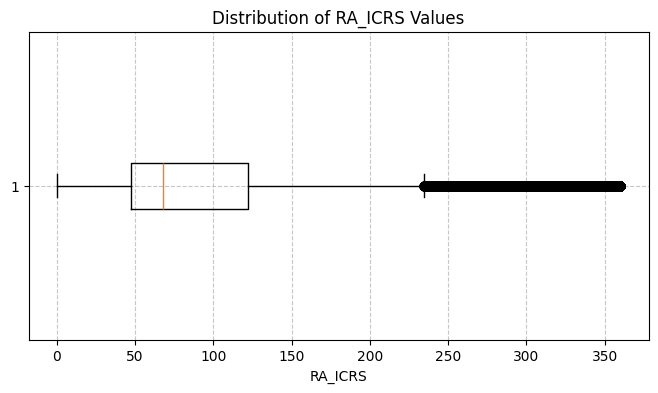

In [17]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['RA_ICRS'].dropna(), vert=False)
plt.title("Distribution of RA_ICRS Values")
plt.xlabel("RA_ICRS")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.3) `DE_ICRS` → declination  
DE_ICRS is a variable that represents the Declination (DE) coordinate of an astronomical object in the International Celestial Reference System (ICRS), typically measured in degrees.

In [18]:
# Missing Values
missing_values = Dataframe['DE_ICRS'].isnull().sum()
print(f"Missing values in 'DE_ICSR': {missing_values}")

total_values = len(Dataframe['DE_ICRS'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'DE_ICSR': 0
Percentage of missing values: 0.00000%


In [19]:
# describtion 
Dataframe['DE_ICRS'].describe()

count    626016.000000
mean         27.758130
std          26.724066
min         -89.098460
25%          18.999283
50%          31.444374
75%          43.771117
max          89.774031
Name: DE_ICRS, dtype: float64

In [20]:
# Doublicates
duplicates = Dataframe['DE_ICRS'].duplicated().sum()
print(f"Number of duplicate entries in 'DE_ICRS': {duplicates}")

Number of duplicate entries in 'DE_ICRS': 0


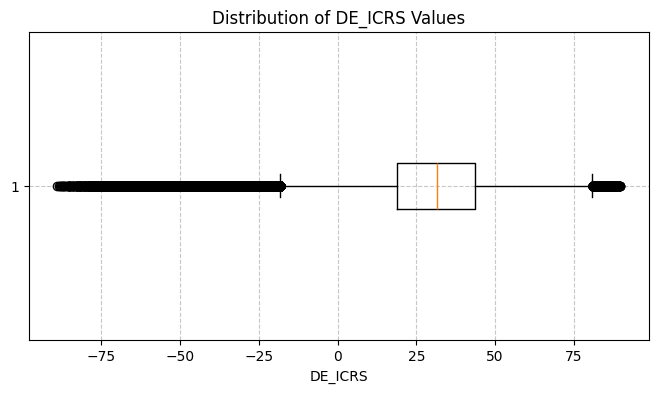

In [21]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['DE_ICRS'].dropna(), vert=False)
plt.title("Distribution of DE_ICRS Values")
plt.xlabel("DE_ICRS")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Visualizing Star Locations and Density with Mollweide Projection

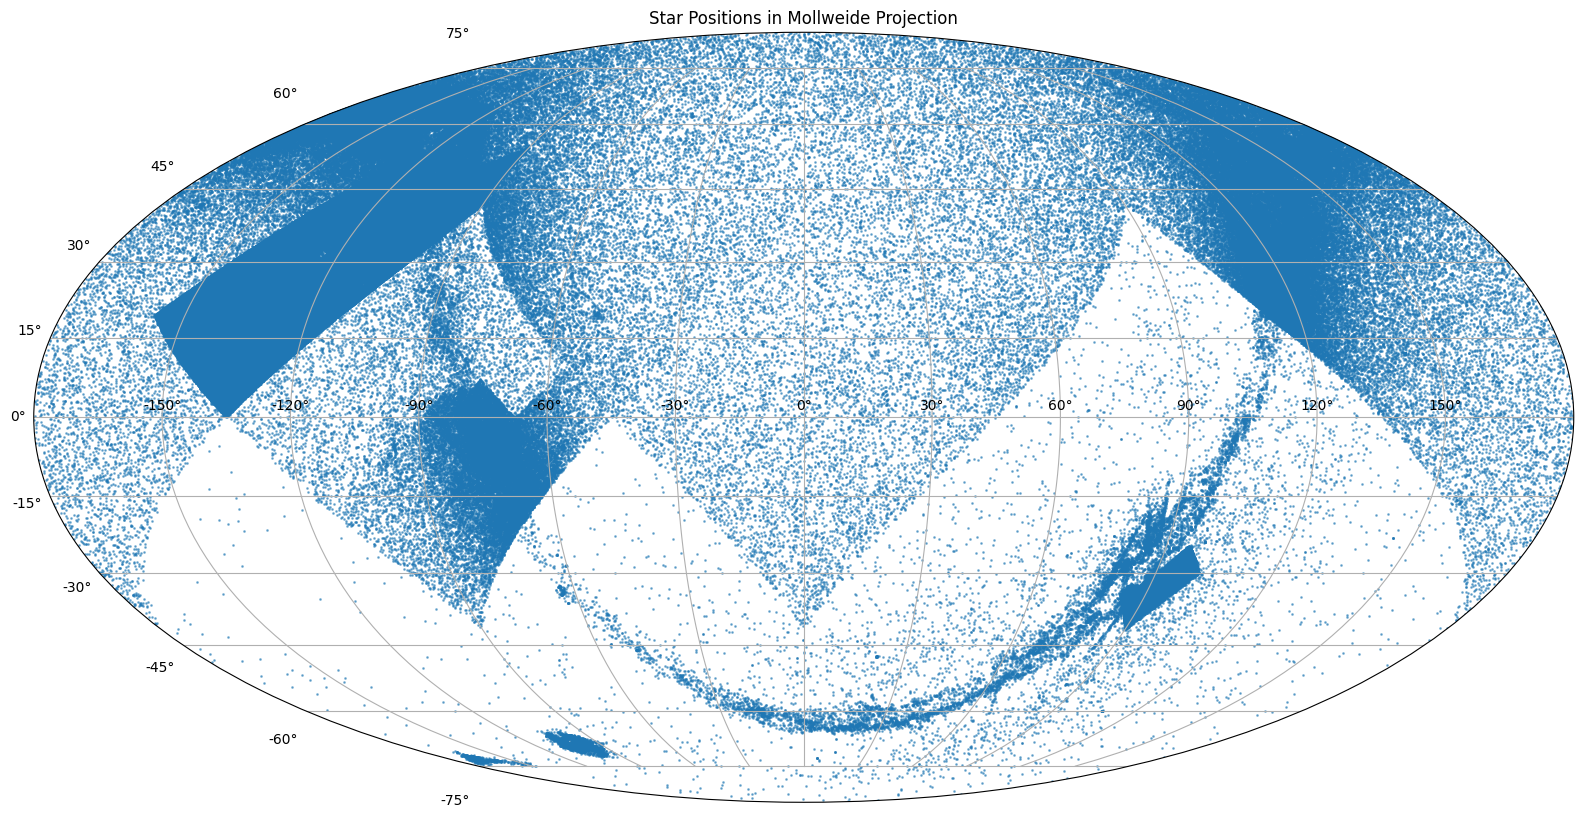

In [22]:
plt.figure(figsize=(20,10))
ra_rad = np.deg2rad(Dataframe['RA_ICRS'].values)  # convert degrees → radians
dec_rad = np.deg2rad(Dataframe['DE_ICRS'].values)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)  # optional: wrap around

plt.subplot(111, projection="mollweide")
plt.scatter(ra_rad - np.pi, dec_rad, s=1, alpha=0.5)  # shift RA center
plt.title("Star Positions in Mollweide Projection")
plt.grid(True)
plt.show()


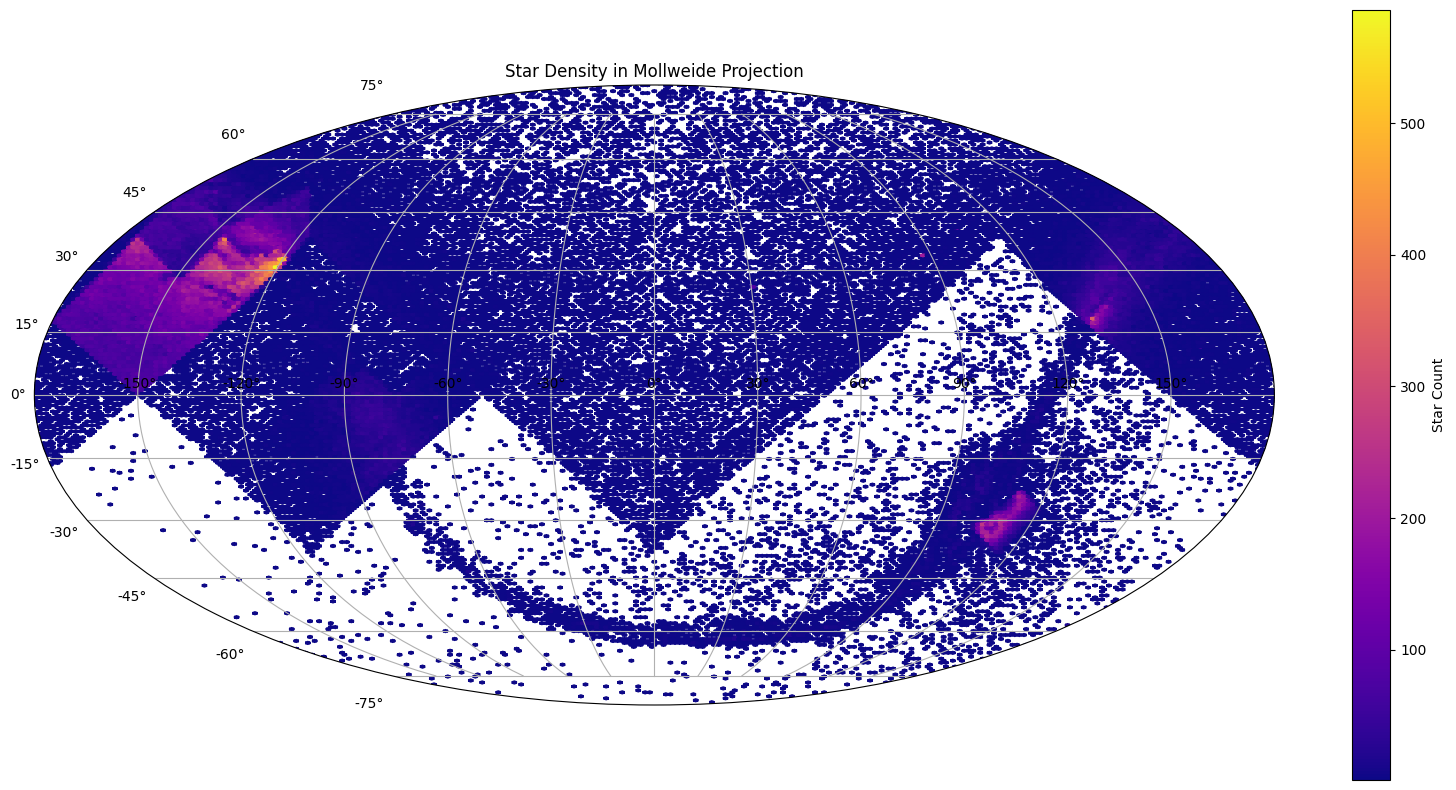

In [23]:
# Convert RA/Dec to radians
ra_rad = np.deg2rad(Dataframe['RA_ICRS'].values)
dec_rad = np.deg2rad(Dataframe['DE_ICRS'].values)

# Wrap RA to [0, 2π]
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad_plot = ra_rad - np.pi  # shift for Mollweide

plt.figure(figsize=(20,10))
plt.subplot(111, projection="mollweide")

# Hexbin for density
hb = plt.hexbin(ra_rad_plot, dec_rad, gridsize=300, cmap='plasma', mincnt=1)
plt.colorbar(hb, label='Star Count')

plt.title("Star Density in Mollweide Projection")
plt.grid(True)
plt.show()


### 3.4) `Plx` → parallax (for distance)  
Plx is a variable that represents the parallax of an astronomical object, measured in milliarcseconds (mas), and is used to estimate the distance to the object.

In [24]:
# Missing Values
missing_values = Dataframe['Plx'].isnull().sum()
print(f"Missing values in 'Plx': {missing_values}")

total_values = len(Dataframe['Gmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Plx': 0
Percentage of missing values: 0.00000%


In [25]:
# describtion 
Dataframe['Plx'].describe()

count    626016.000000
mean          1.466432
std           2.015173
min          -5.014100
25%           0.313100
50%           0.850400
75%           1.633600
max          95.047700
Name: Plx, dtype: float64

In [26]:
# Doublicates
duplicates = Dataframe['Plx'].duplicated().sum()
print(f"Number of duplicate entries in 'plx': {duplicates}")

Number of duplicate entries in 'plx': 548935


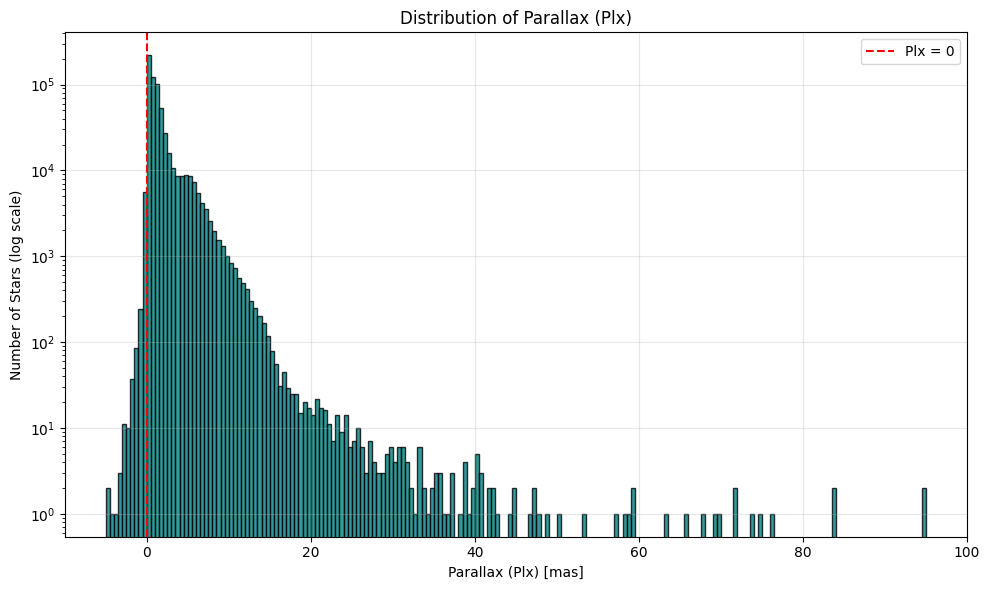

In [27]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Plx'], bins=200, color='teal', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Parallax (Plx) [mas]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Parallax (Plx)')
plt.axvline(0, color='red', linestyle='--', label='Plx = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


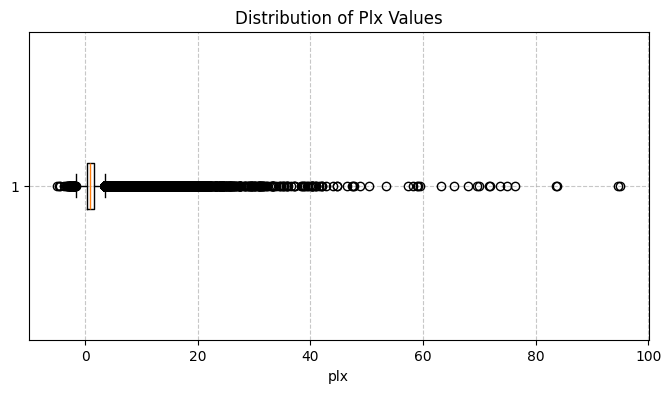

In [28]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Plx'].dropna(), vert=False)
plt.title("Distribution of Plx Values")
plt.xlabel("plx")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.5) `PM` → total proper motion  
PM is a variable that represents the total proper motion of an astronomical object, measured in milliarcseconds per year (mas/yr), indicating the object's apparent motion across the sky due to its velocity relative to the Solar System.

In [29]:
# Missing Values
missing_values = Dataframe['PM'].isnull().sum()
print(f"Missing values in 'PM': {missing_values}")

total_values = len(Dataframe['PM'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'PM': 0
Percentage of missing values: 0.00000%


In [30]:
# describtion 
Dataframe['PM'].describe()

count    626016.000000
mean         11.114728
std          19.287210
min           0.002000
25%           2.486000
50%           5.508000
75%          10.857000
max         688.189000
Name: PM, dtype: float64

In [31]:
# Doublicates
duplicates = Dataframe['PM'].duplicated().sum()
print(f"Number of duplicate entries in 'PM': {duplicates}")

Number of duplicate entries in 'PM': 561887


We check for duplicate proper motion values (`PM`). Note that duplicates here are normal, many stars can share the same proper motion, especially distant stars or those in clusters. Seeing repeated values doesn’t mean the stars themselves are duplicates.


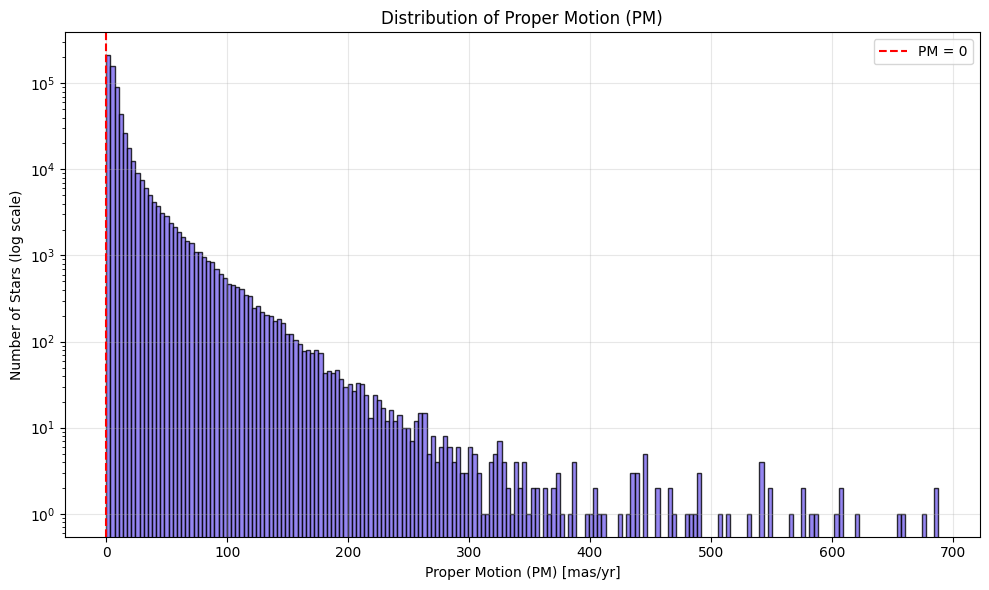

In [32]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['PM'], bins=200, color='mediumslateblue', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Proper Motion (PM) [mas/yr]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Proper Motion (PM)')
plt.axvline(0, color='red', linestyle='--', label='PM = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

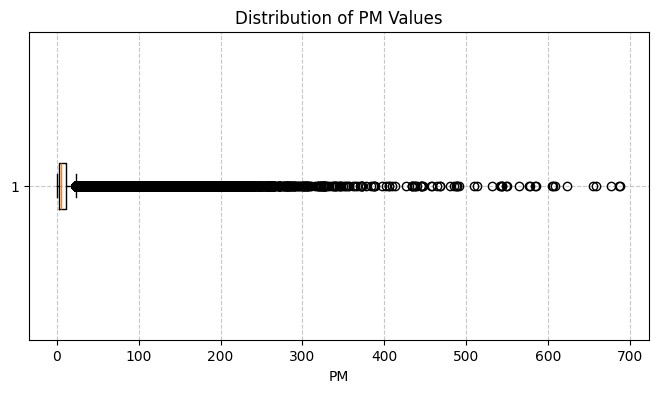

In [33]:
# Boxplot for RA_ICRS distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['PM'].dropna(), vert=False)
plt.title("Distribution of PM Values")
plt.xlabel("PM")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.6) `pmRA` → proper motion in RA  
pmRA is a variable that represents the proper motion of an astronomical object in the direction of right ascension (RA), measured in milliarcseconds per year (mas/yr), indicating how the object's position changes along the RA axis over time.

In [34]:
# Missing Values
missing_values = Dataframe['pmRA'].isnull().sum()
print(f"Missing values in 'pmRA': {missing_values}")

total_values = len(Dataframe['Gmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'pmRA': 0
Percentage of missing values: 0.00000%


In [35]:
# describtion 
Dataframe['pmRA'].describe()

count    626016.000000
mean          1.332241
std          15.950555
min        -584.663000
25%          -2.380000
50%           0.059000
75%           3.162000
max         606.357000
Name: pmRA, dtype: float64

In [36]:
# Doublicates
duplicates = Dataframe['pmRA'].duplicated().sum()
print(f"Number of duplicate entries in 'pmRA': {duplicates}")

Number of duplicate entries in 'pmRA': 553167


We check for duplicate proper motion in the right ascension direction (`pmRA`). Duplicates are normal—many stars can have the same `pmRA`, especially distant stars or members of clusters. Repeated values don’t indicate duplicate stars.


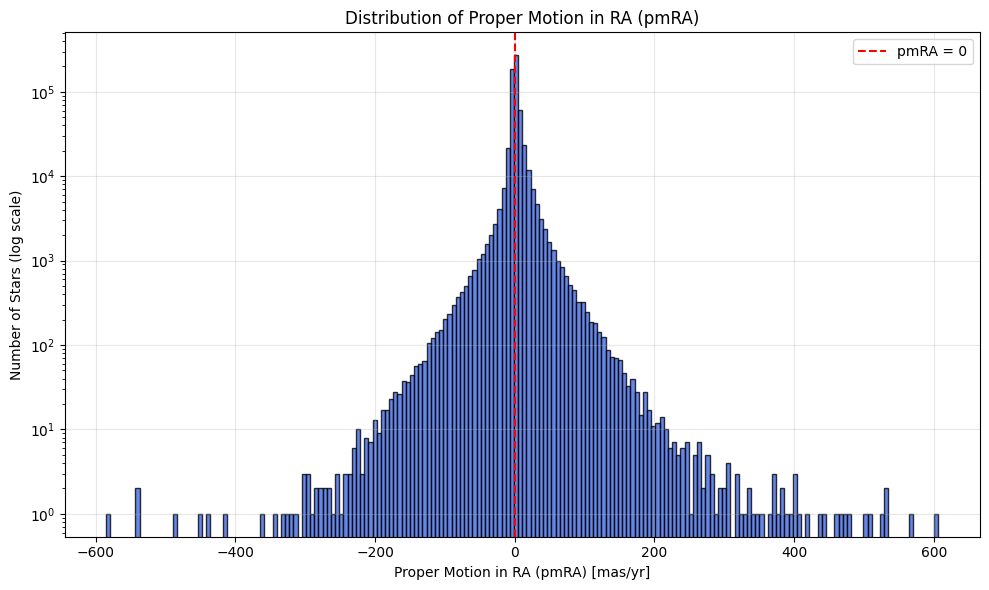

In [37]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['pmRA'], bins=200, color='royalblue', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Proper Motion in RA (pmRA) [mas/yr]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Proper Motion in RA (pmRA)')
plt.axvline(0, color='red', linestyle='--', label='pmRA = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

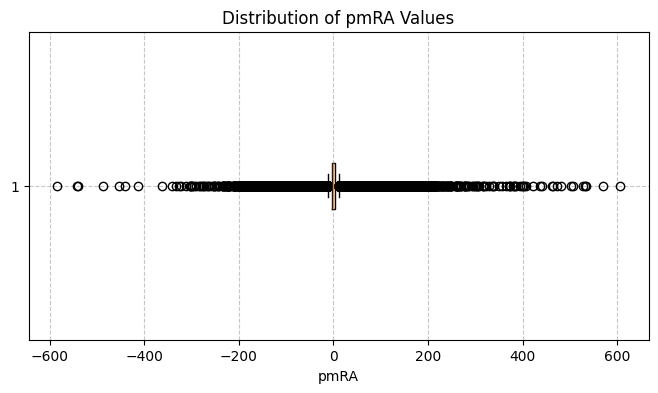

In [38]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['pmRA'].dropna(), vert=False)
plt.title("Distribution of pmRA Values")
plt.xlabel("pmRA")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.7) `pmDE` → proper motion in Dec 
pmDE is a variable that represents the proper motion of an astronomical object in the direction of declination (Dec), measured in milliarcseconds per year (mas/yr), indicating how the object's position changes along the Dec axis over time.

In [39]:
# Missing Values
missing_values = Dataframe['pmDE'].isnull().sum()
print(f"Missing values in 'pmDE': {missing_values}")

total_values = len(Dataframe['pmDE'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'pmDE': 0
Percentage of missing values: 0.00000%


In [40]:
# describtion 
Dataframe['pmDE'].describe()

count    626016.000000
mean         -5.593703
std          14.423909
min        -583.413000
25%          -6.911250
50%          -3.025000
75%          -0.585000
max         478.562000
Name: pmDE, dtype: float64

In [41]:
# Doublicates
duplicates = Dataframe['pmDE'].duplicated().sum()
print(f"Number of duplicate entries in 'pmDE': {duplicates}")

Number of duplicate entries in 'pmDE': 558886


We check for duplicate proper motion in the declination direction (`pmDE`). Duplicates are expected—many stars can share the same `pmDE`, particularly distant stars or stars in clusters. Repeated values do not mean the stars themselves are duplicates.

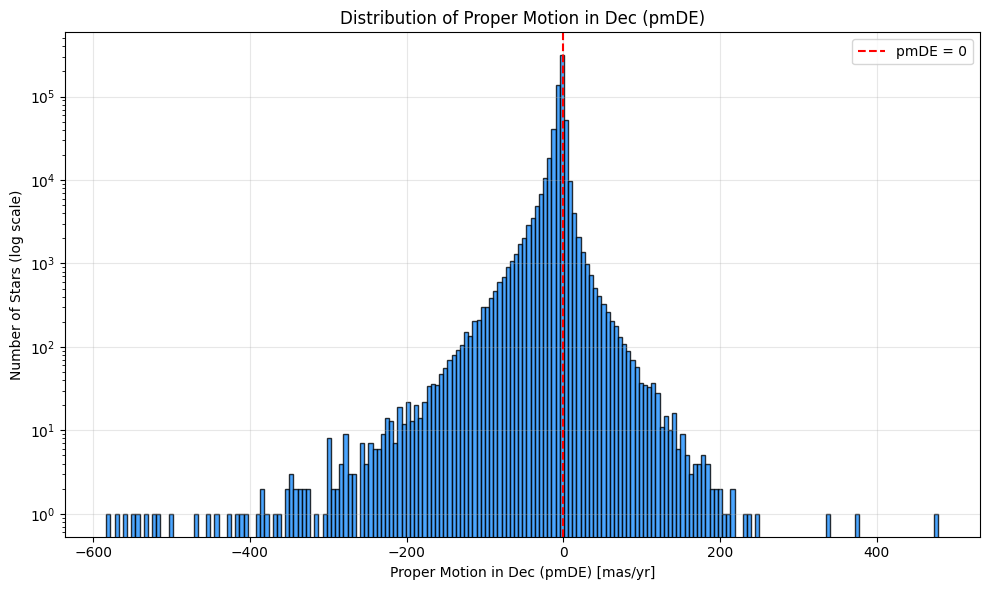

In [42]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['pmDE'], bins=200, color='dodgerblue', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Proper Motion in Dec (pmDE) [mas/yr]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Proper Motion in Dec (pmDE)')
plt.axvline(0, color='red', linestyle='--', label='pmDE = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

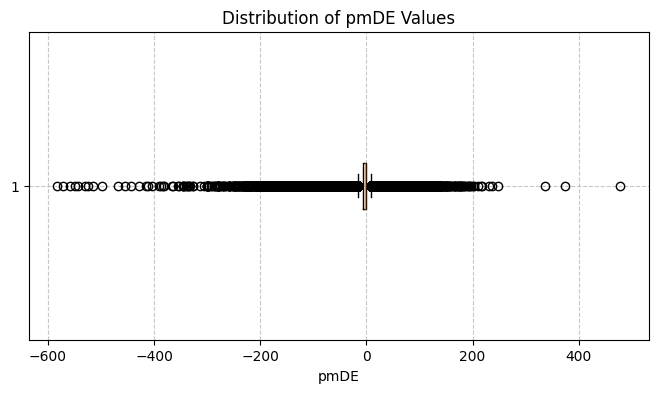

In [43]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['pmDE'].dropna(), vert=False)
plt.title("Distribution of pmDE Values")
plt.xlabel("pmDE")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.8) `Dist` → distance (derived from parallax) 
Dist is a variable that represents the distance to an astronomical object, typically measured in parsecs, and is derived from its parallax (Plx) value.

In [44]:
# Missing Values
missing_values = Dataframe['Dist'].isnull().sum()
print(f"Missing values in 'Dist': {missing_values}")

total_values = len(Dataframe['Gmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Dist': 0
Percentage of missing values: 0.00000%


In [45]:
# describtion 
Dataframe['Dist'].describe()

count    626016.000000
mean       2150.402903
std        3216.573066
min          10.519300
25%         586.924225
50%        1104.667850
75%        2607.726875
max       35666.805000
Name: Dist, dtype: float64

In [46]:
# Doublicates
duplicates = Dataframe['Dist'].duplicated().sum()
print(f"Number of duplicate entries in 'Dist': {duplicates}")

Number of duplicate entries in 'Dist': 28005


We check for duplicate distances (`Dist`). Duplicates are expected—many stars can share the same distance, especially stars in clusters or very distant stars. Repeated values do not mean the stars themselves are duplicates.

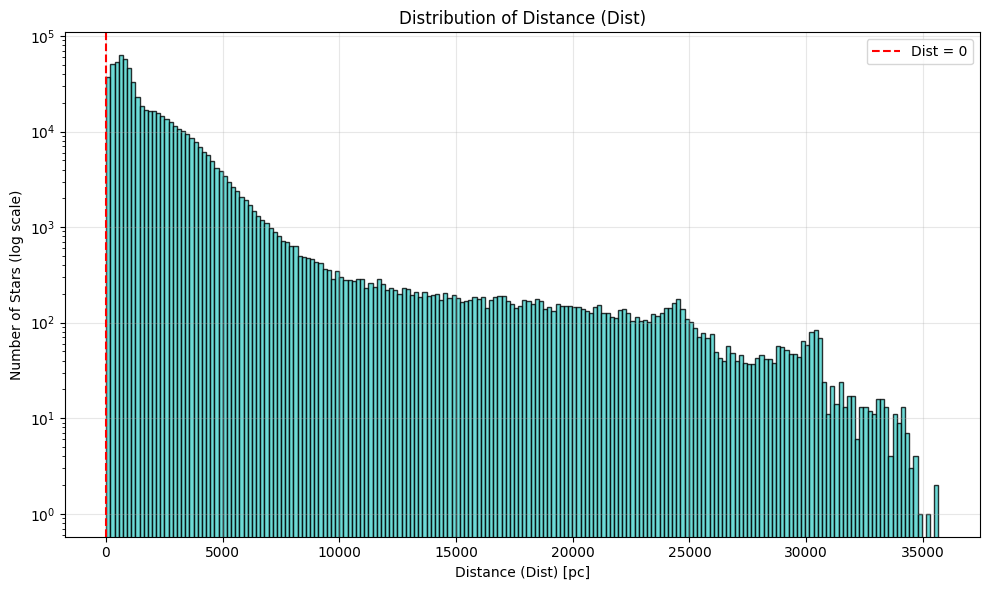

In [47]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Dist'], bins=200, color='mediumturquoise', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Distance (Dist) [pc]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Distance (Dist)')
plt.axvline(0, color='red', linestyle='--', label='Dist = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

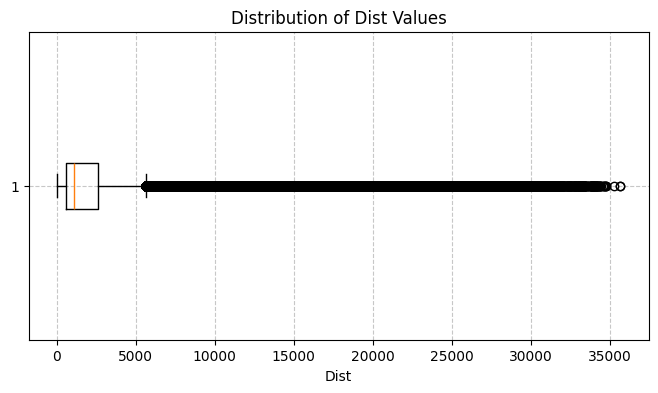

In [48]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Dist'].dropna(), vert=False)
plt.title("Distribution of Dist Values")
plt.xlabel("Dist")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.9) `Gmag` → Gaia G-band magnitude  
Gmag is a variable that represents the Gaia G-band magnitude, which measures the brightness of an astronomical object in the broad optical G-band filter used by the Gaia mission. Lower values indicate brighter objects.

In [49]:
# Missing Values
missing_values = Dataframe['Gmag'].isnull().sum()
print(f"Missing values in 'Gmag': {missing_values}")

total_values = len(Dataframe['Gmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Gmag': 1
Percentage of missing values: 0.00016%


In [50]:
# describtion 
Dataframe['Gmag'].describe()

count    626015.000000
mean         13.722921
std           1.703660
min           2.740842
25%          12.766452
50%          14.102600
75%          14.800481
max          17.649721
Name: Gmag, dtype: float64

In [51]:
# Doublicates
duplicates = Dataframe['Gmag'].duplicated().sum()
print(f"Number of duplicate entries in 'Gmag': {duplicates}")

Number of duplicate entries in 'Gmag': 39589


We check for duplicate brightness values in the Gaia G-band magnitude (`Gmag`). Duplicates are expected—many stars can share the same G-band magnitude, especially stars with similar luminosities or at similar distances. Repeated values do not mean the stars themselves are duplicates.


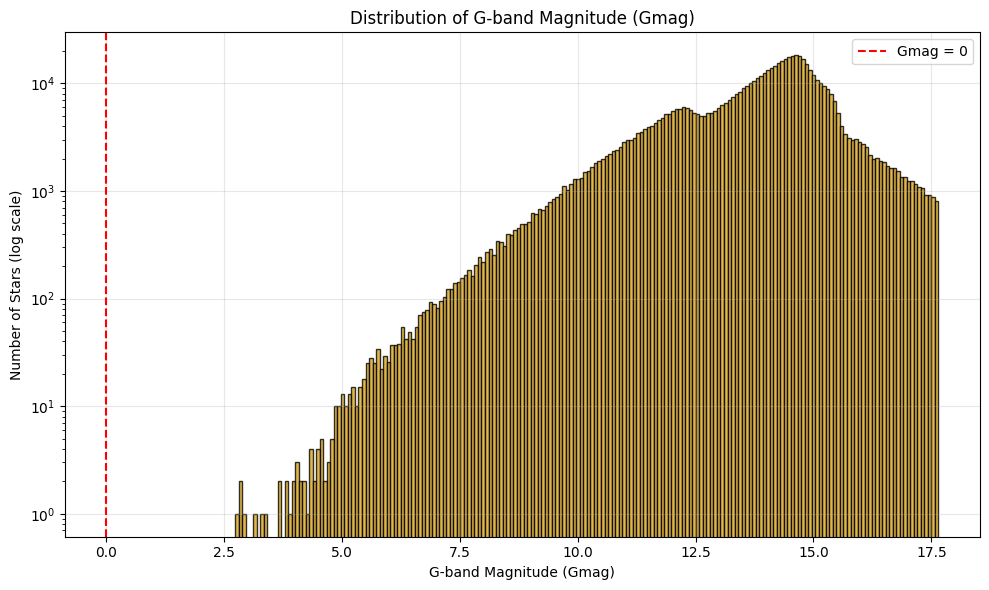

In [52]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Gmag'], bins=200, color='goldenrod', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('G-band Magnitude (Gmag)')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of G-band Magnitude (Gmag)')
plt.axvline(0, color='red', linestyle='--', label='Gmag = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

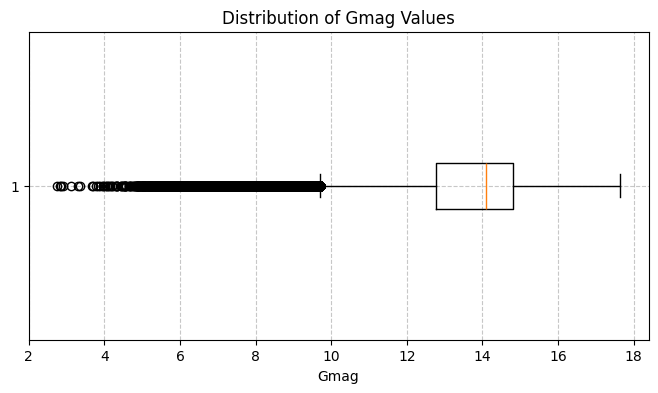

In [53]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Gmag'].dropna(), vert=False)
plt.title("Distribution of Gmag Values")
plt.xlabel("Gmag")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.10) `BPmag` → blue-band magnitude  
BPmag is a variable that represents the blue-band magnitude, measuring the brightness of an astronomical object in the Gaia BP (Blue Photometer) filter. Lower values indicate brighter objects.

In [54]:
# Missing Values
missing_values = Dataframe['BPmag'].isnull().sum()
print(f"Missing values in 'BPmag': {missing_values}")

total_values = len(Dataframe['BPmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'BPmag': 1
Percentage of missing values: 0.00016%


In [55]:
# describtion 
Dataframe['BPmag'].describe()

count    626015.000000
mean         14.343106
std           1.919894
min           3.023606
25%          13.296550
50%          14.676191
75%          15.562683
max          21.326849
Name: BPmag, dtype: float64

In [56]:
# Doublicates
duplicates = Dataframe['BPmag'].duplicated().sum()
print(f"Number of duplicate entries in 'BPmag': {duplicates}")

Number of duplicate entries in 'BPmag': 35680


We check for duplicate brightness values in the Gaia BP-band magnitude (`BPmag`). Duplicates are expected—many stars can share the same BP-band magnitude, especially stars with similar luminosities or at similar distances. Repeated values do not mean the stars themselves are duplicates.


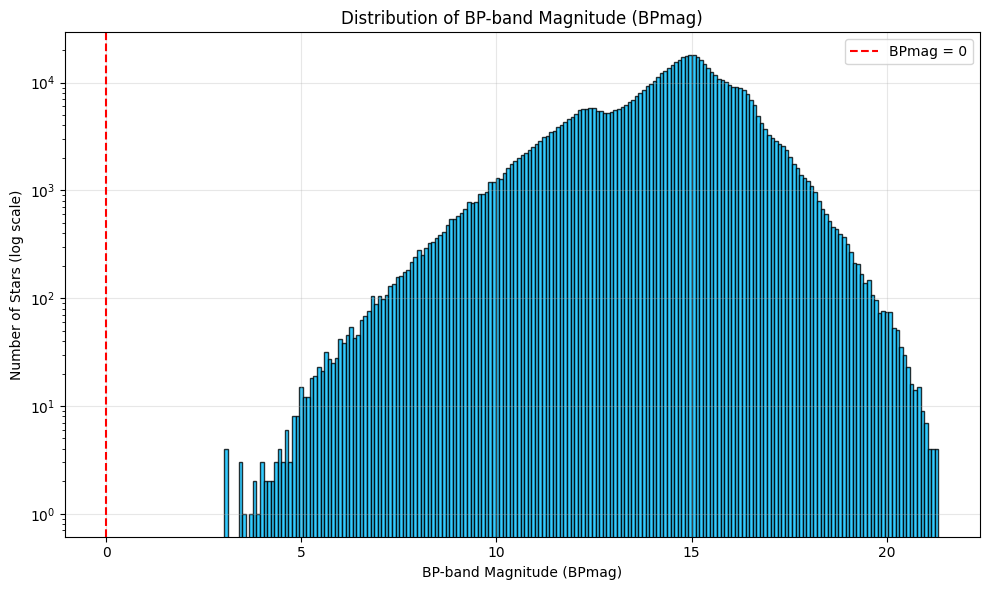

In [57]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['BPmag'], bins=200, color='deepskyblue', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('BP-band Magnitude (BPmag)')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of BP-band Magnitude (BPmag)')
plt.axvline(0, color='red', linestyle='--', label='BPmag = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

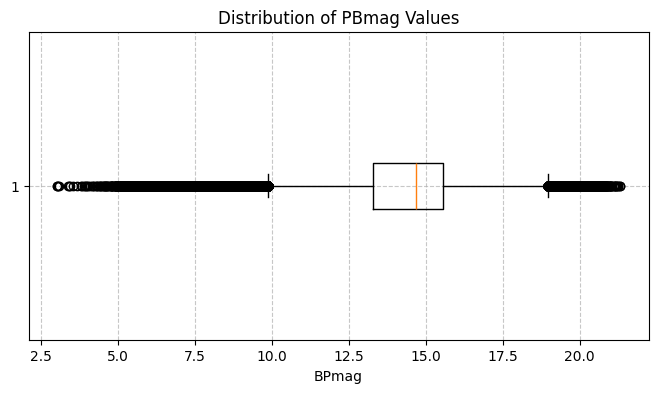

In [58]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['BPmag'].dropna(), vert=False)
plt.title("Distribution of PBmag Values")
plt.xlabel("BPmag")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.11) `RPmag` → red-band magnitude  
RPmag is a variable that represents the red-band magnitude, measuring the brightness of an astronomical object in the Gaia RP (Red Photometer) filter. Lower values indicate brighter objects.

In [59]:
# Missing Values
missing_values = Dataframe['RPmag'].isnull().sum()
print(f"Missing values in 'RPmag': {missing_values}")

total_values = len(Dataframe['RPmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'RPmag': 0
Percentage of missing values: 0.00000%


In [60]:
# describtion 
Dataframe['RPmag'].describe()

count    626016.000000
mean         13.040814
std           1.608804
min           2.672661
25%          12.093490
50%          13.380783
75%          14.025878
max          18.051123
Name: RPmag, dtype: float64

In [61]:
# Doublicates
duplicates = Dataframe['RPmag'].duplicated().sum()
print(f"Number of duplicate entries in 'RPmag': {duplicates}")

Number of duplicate entries in 'RPmag': 44561


We check for duplicate brightness values in the Gaia RP-band magnitude (`RPmag`). Duplicates are expected—many stars can share the same RP-band magnitude, especially stars with similar luminosities or at similar distances. Repeated values do not mean the stars themselves are duplicates.

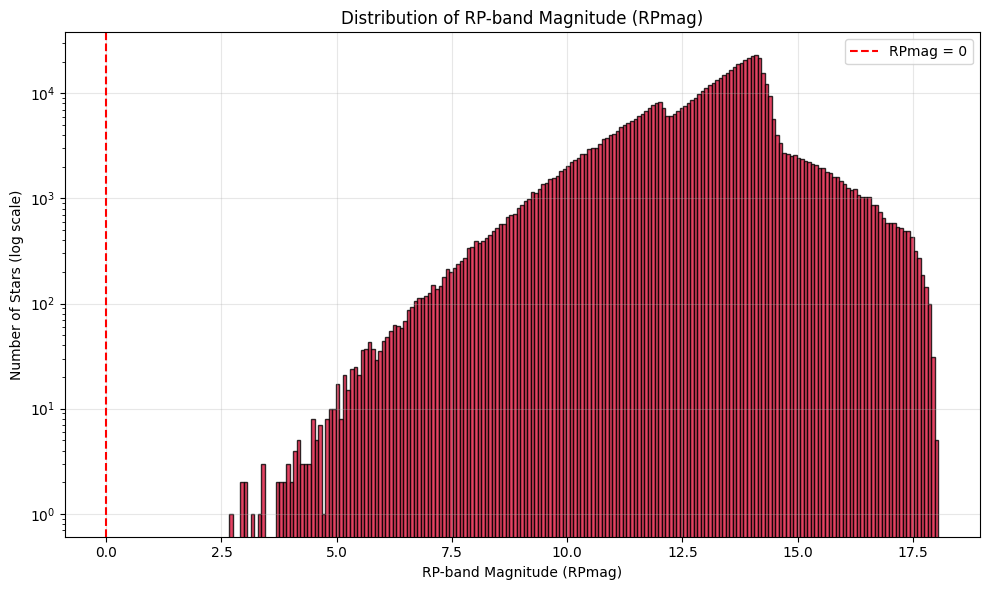

In [62]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['RPmag'], bins=200, color='crimson', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('RP-band Magnitude (RPmag)')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of RP-band Magnitude (RPmag)')
plt.axvline(0, color='red', linestyle='--', label='RPmag = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

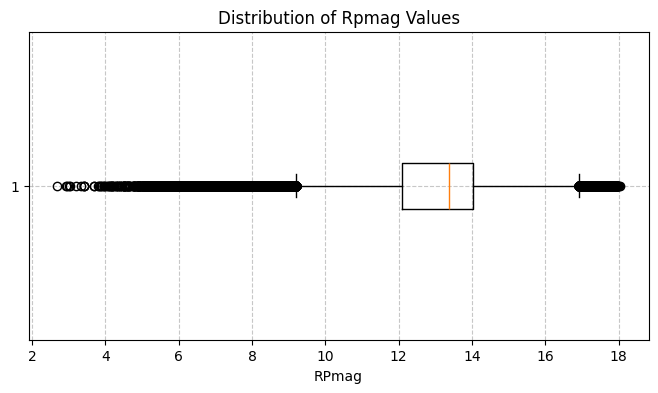

In [63]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['RPmag'].dropna(), vert=False)
plt.title("Distribution of Rpmag Values")
plt.xlabel("RPmag")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Visual Exploration of Star Magnitudes and Colors

### 1. Histogram of Gmag, BPmag, RPmag
This histogram shows the distribution of the three main Gaia magnitudes (`Gmag`, `BPmag`, `RPmag`). It gives a sense of the brightness distribution across the entire dataset and highlights where most stars lie in terms of apparent magnitude.


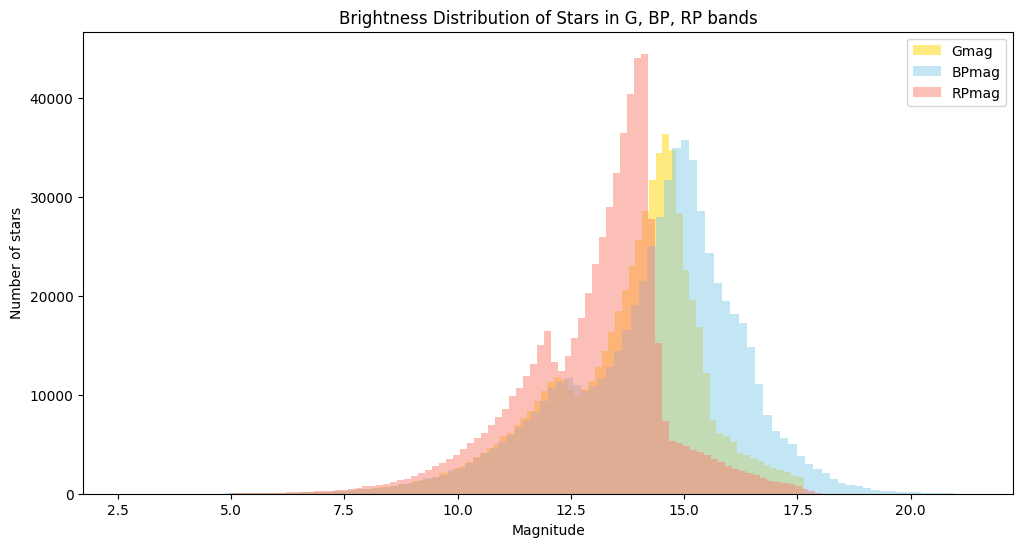

In [64]:
plt.figure(figsize=(12,6))
plt.hist(Dataframe['Gmag'].dropna(), bins=100, alpha=0.5, label='Gmag', color='gold')
plt.hist(Dataframe['BPmag'].dropna(), bins=100, alpha=0.5, label='BPmag', color='skyblue')
plt.hist(Dataframe['RPmag'].dropna(), bins=100, alpha=0.5, label='RPmag', color='salmon')
plt.xlabel('Magnitude')
plt.ylabel('Number of stars')
plt.title('Brightness Distribution of Stars in G, BP, RP bands')
plt.legend()
plt.show()


### 2. Color of the First X Stars
Here we visualize the actual colors of the first `X` stars in the dataset. The colors are estimated from the `BP-RP` index:
- Bluer dots indicate hotter, bluer stars.
- Redder dots indicate cooler, redder stars.
This gives a small-scale, intuitive look at the diversity of star colors.

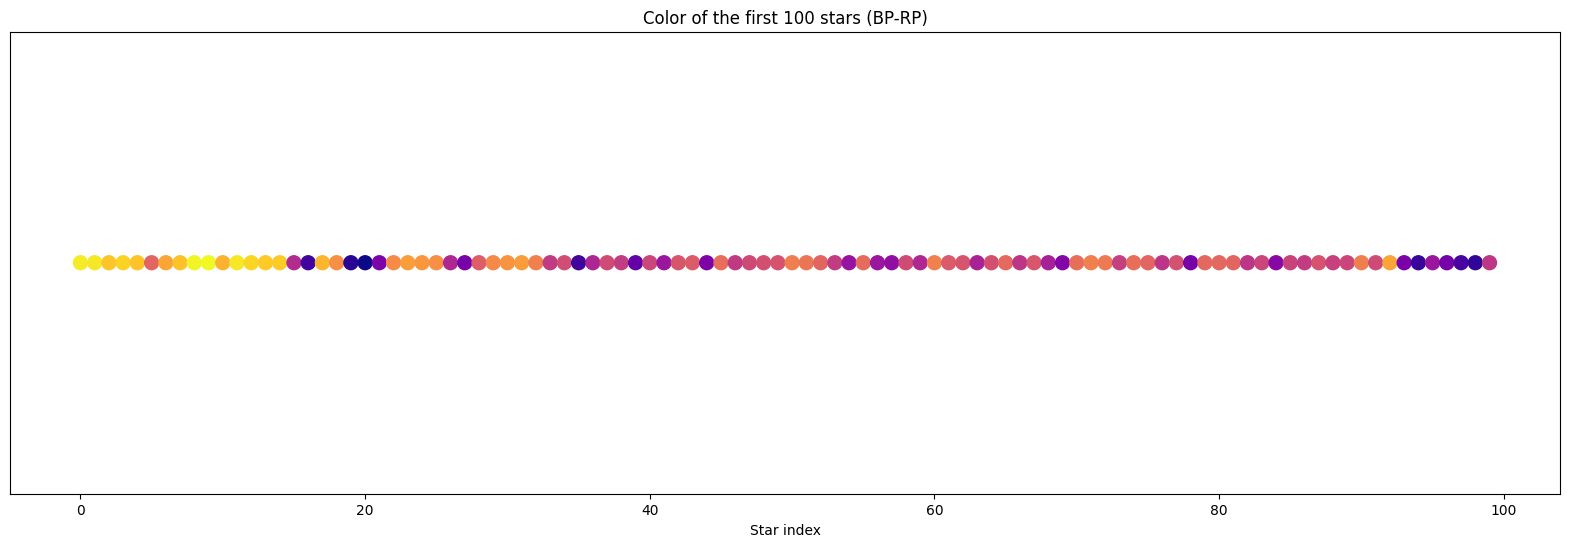

In [65]:

# Pick first x stars
x = 100
bp_rp = Dataframe['BPmag'].values[:x] - Dataframe['RPmag'].values[:x]

# Normalize BP-RP to 0-1 for coloring
norm = (bp_rp - bp_rp.min()) / (bp_rp.max() - bp_rp.min())
colors = plt.cm.plasma(1 - norm)  # inverted so blue=bluer stars, red=redder stars

plt.figure(figsize=(20,6))
plt.scatter(range(x), np.zeros(x), c=colors, s=100)
plt.title(f'Color of the first {x} stars (BP-RP)')
plt.xlabel('Star index')
plt.yticks([])
plt.show()


### 3. Star Positions Colored by BP-RP
This Mollweide projection shows the positions of all stars in the sky, colored by their `BP-RP` index:
- Blue stars represent bluer/hotter stars.
- Red stars represent redder/cooler stars.
It helps to visualize the **distribution of star colors across the sky** and spot regions rich in different stellar types.

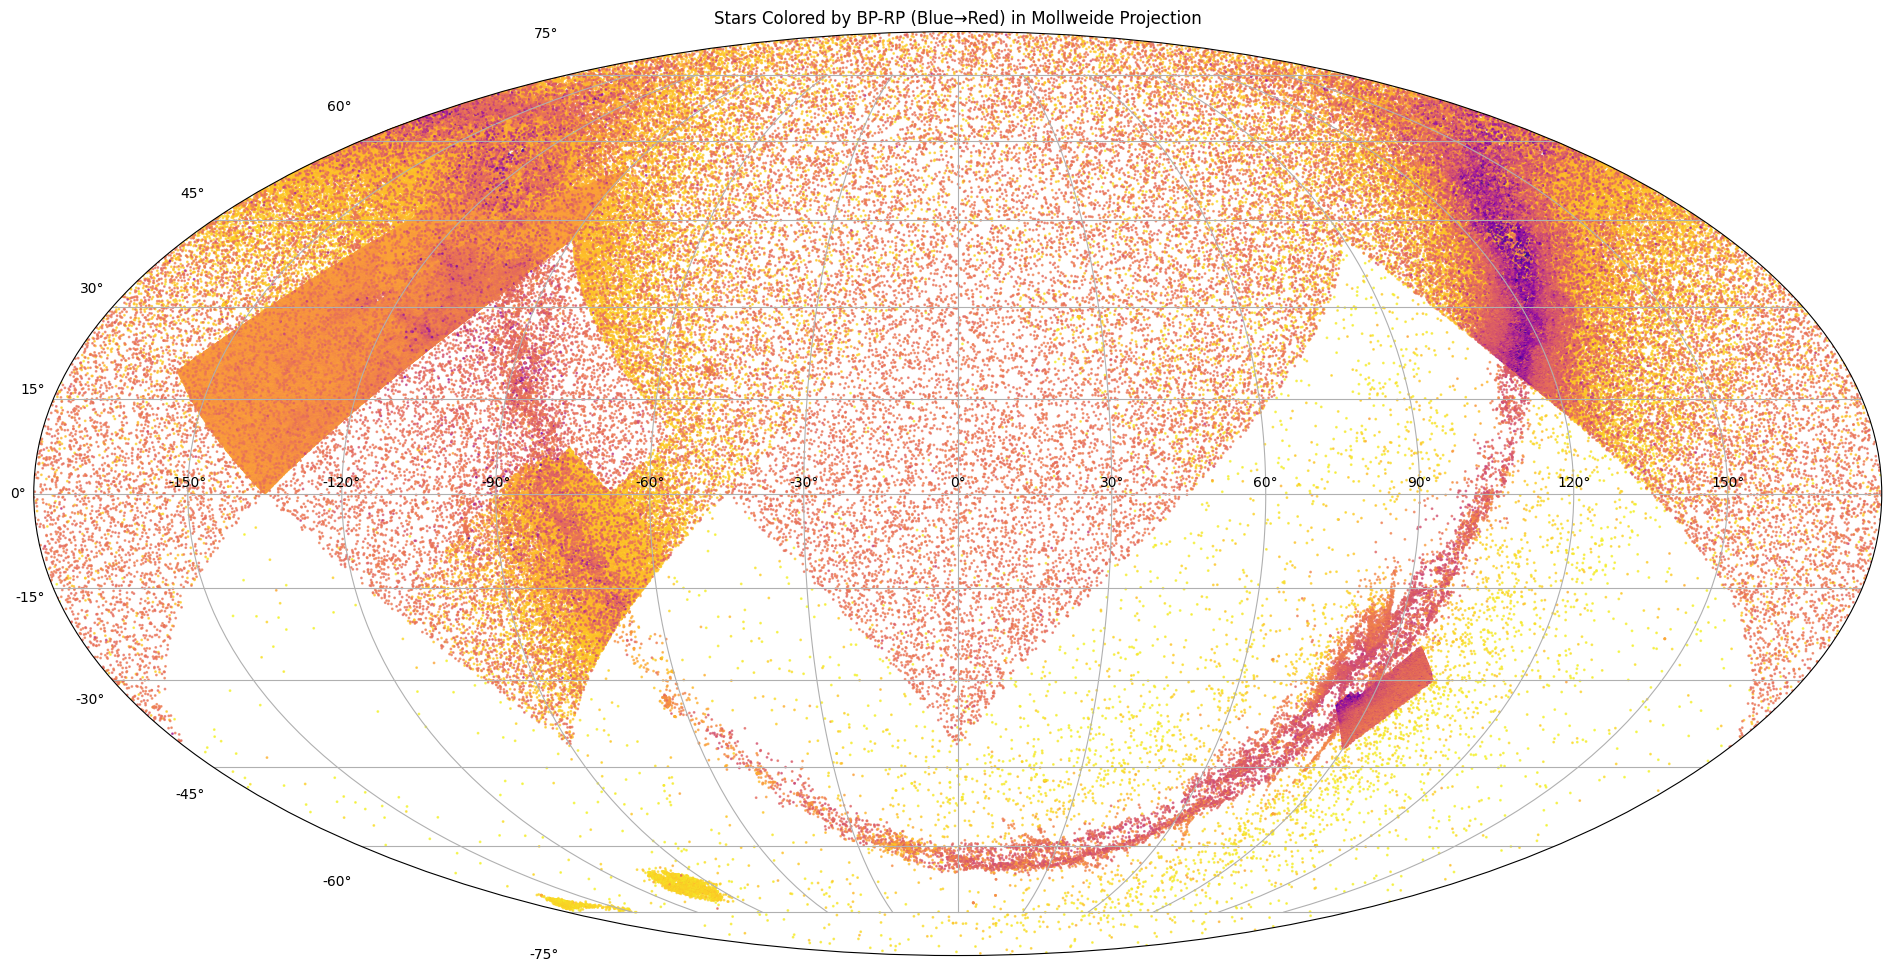

In [66]:
# RA/Dec → radians
ra_rad = np.deg2rad(Dataframe['RA_ICRS'].values)
dec_rad = np.deg2rad(Dataframe['DE_ICRS'].values)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)  # wrap
ra_plot = ra_rad - np.pi  # shift for Mollweide

# BP-RP color index → star color
bp_rp = Dataframe['BPmag'] - Dataframe['RPmag']
# normalize to 0-1
norm = (bp_rp - bp_rp.min()) / (bp_rp.max() - bp_rp.min())
colors = plt.cm.plasma(1 - norm)  # blue = bluer stars, red = redder

plt.figure(figsize=(24,12))
plt.subplot(111, projection="mollweide")
plt.scatter(ra_plot, dec_rad, c=colors, s=1, alpha=0.7)
plt.title("Stars Colored by BP-RP (Blue→Red) in Mollweide Projection")
plt.grid(True)
plt.show()

### 3.12) `Teff` → effective temperature 
Teff is a variable that represents the effective temperature of a star, describing the temperature of a blackbody that would emit the same total amount of electromagnetic radiation as the star. Higher values indicate hotter stars.

In [67]:
# Missing Values
missing_values = Dataframe['Teff'].isnull().sum()
print(f"Missing values in 'teff': {missing_values}")

total_values = len(Dataframe['Teff'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'teff': 0
Percentage of missing values: 0.00000%


In [68]:
# describtion 
Dataframe['Teff'].describe()

count    626016.000000
mean       7295.083343
std        3769.970693
min        3039.229700
25%        5217.454250
50%        5957.607200
75%        8391.984000
max       41504.020000
Name: Teff, dtype: float64

In [69]:
# Doublicates
duplicates = Dataframe['Teff'].duplicated().sum()
print(f"Number of duplicate entries in 'teff': {duplicates}")

Number of duplicate entries in 'teff': 119268


We checked for duplicate effective temperature values (`Teff`). Duplicates are expected, many stars can share the same effective temperature, especially if they are similar types of stars or at similar stages of their evolution. Repeated values in `Teff` do not indicate that the stars themselves are duplicates.


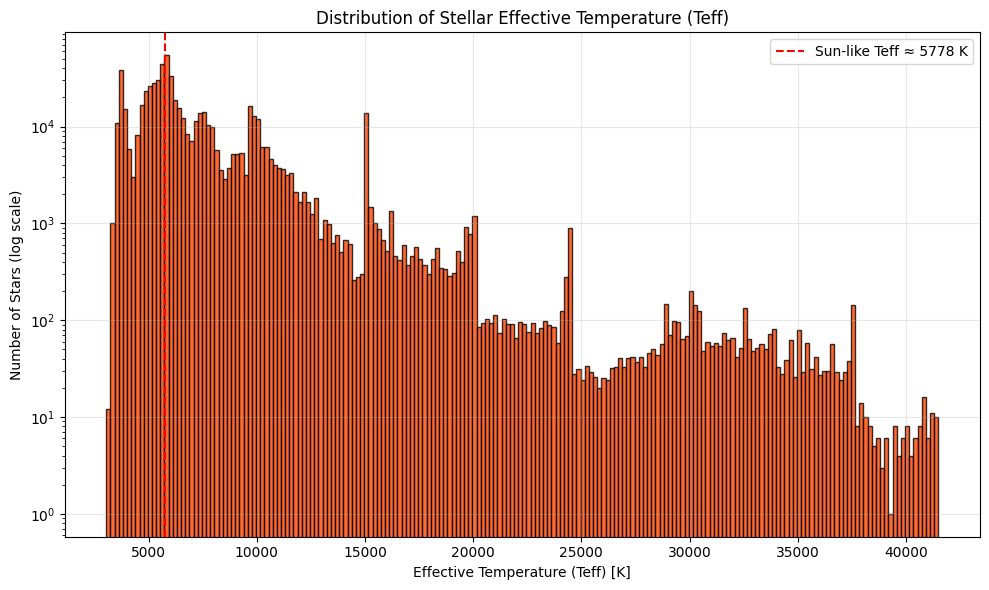

In [70]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Teff'], bins=200, color='orangered', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Effective Temperature (Teff) [K]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Effective Temperature (Teff)')
plt.axvline(5778, color='red', linestyle='--', label='Sun-like Teff ≈ 5778 K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


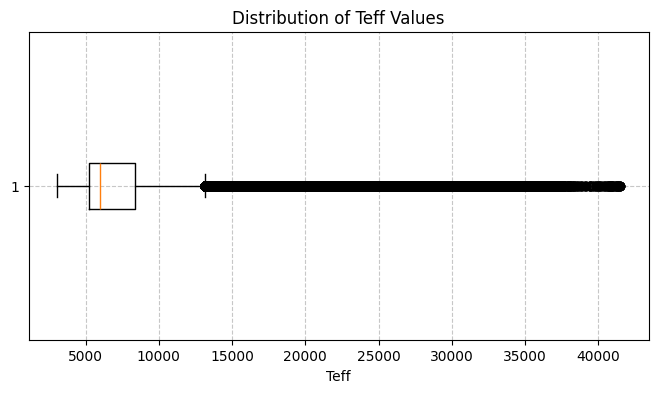

In [71]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Teff'].dropna(), vert=False)
plt.title("Distribution of Teff Values")
plt.xlabel("Teff")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.13) `logg` → surface gravity  
logg is a variable that represents the **surface gravity** of a star, measured in logarithmic cgs units (cm/s²). Higher values indicate stronger gravity at the star's surface, typical of denser or smaller stars, while lower values correspond to more extended or less dense stars.


In [72]:
# Missing Values
missing_values = Dataframe['logg'].isnull().sum()
print(f"Missing values in 'logg': {missing_values}")

total_values = len(Dataframe['logg'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'logg': 0
Percentage of missing values: 0.00000%


In [73]:
# describtion 
Dataframe['logg'].describe()

count    626016.000000
mean          3.755349
std           0.884476
min          -0.475500
25%           3.598100
50%           4.024800
75%           4.263900
max           4.942500
Name: logg, dtype: float64

In [74]:
# Doublicates
duplicates = Dataframe['logg'].duplicated().sum()
print(f"Number of duplicate entries in 'logg': {duplicates}")

Number of duplicate entries in 'logg': 582589


We checked for duplicate surface gravity values (`logg`). Duplicates are expected,many stars can share the same surface gravity, especially if they are similar types of stars or at similar evolutionary stages. Repeated values in `logg` do not indicate that the stars themselves are duplicates.


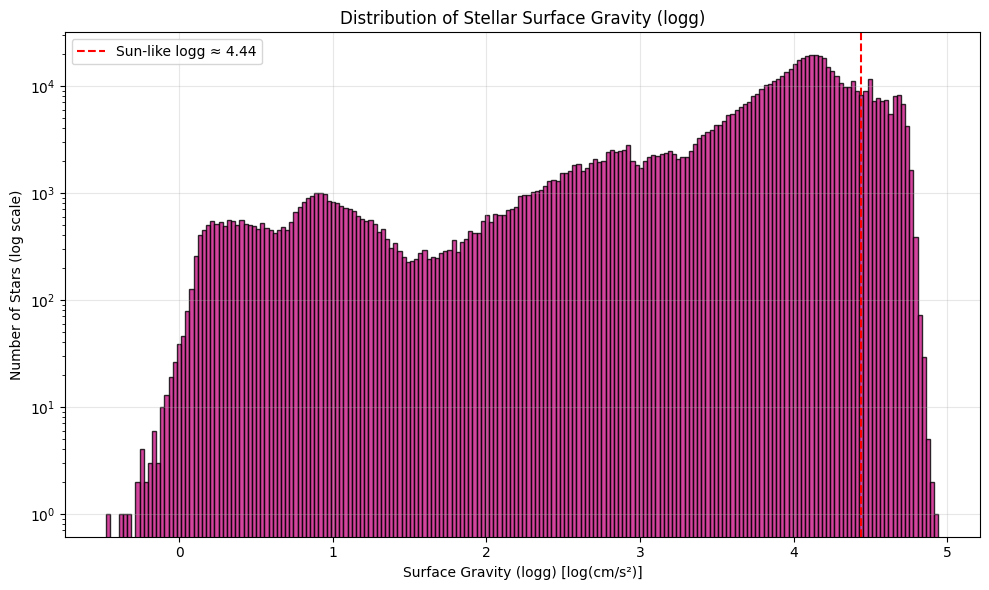

In [75]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['logg'], bins=200, color='mediumvioletred', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Surface Gravity (logg) [log(cm/s²)]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Surface Gravity (logg)')
plt.axvline(4.44, color='red', linestyle='--', label='Sun-like logg ≈ 4.44')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

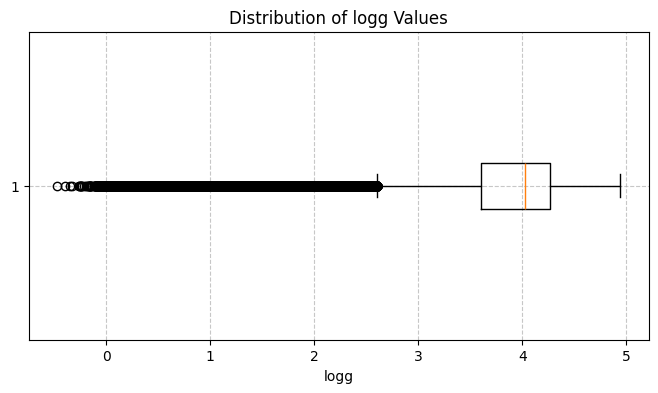

In [76]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['logg'].dropna(), vert=False)
plt.title("Distribution of logg Values")
plt.xlabel("logg")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.14) `[Fe/H]` → metallicity  
[Fe/H] is a variable that represents the **metallicity** of a star, measuring the abundance of elements heavier than hydrogen and helium relative to the Sun. Higher values indicate more metal-rich stars, while lower values indicate more metal-poor stars.


In [77]:
# Missing Values
missing_values = Dataframe['[Fe/H]'].isnull().sum()
print(f"Missing values in '[Fe/H]': {missing_values}")

total_values = len(Dataframe['[Fe/H]'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in '[Fe/H]': 0
Percentage of missing values: 0.00000%


In [78]:
# describtion 
Dataframe['[Fe/H]'].describe()

count    626016.000000
mean         -0.380814
std           0.452022
min          -4.143400
25%          -0.605300
50%          -0.311350
75%          -0.086500
max           0.800000
Name: [Fe/H], dtype: float64

In [79]:
# Doublicates
duplicates = Dataframe['[Fe/H]'].duplicated().sum()
print(f"Number of duplicate entries in '[Fe/H]': {duplicates}")

Number of duplicate entries in '[Fe/H]': 598239


We checked for duplicate metallicity values (`[Fe/H]`). Duplicates are expected, many stars can share the same metallicity, especially if they formed in similar environments or clusters. Repeated values in `[Fe/H]` do not indicate that the stars themselves are duplicates.


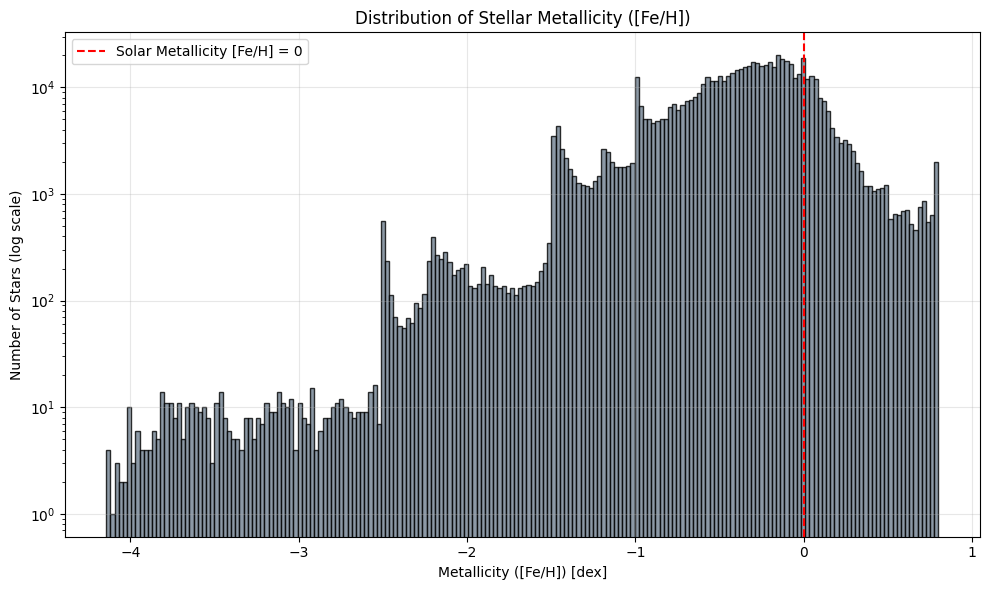

In [80]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['[Fe/H]'], bins=200, color='slategray', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Metallicity ([Fe/H]) [dex]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Metallicity ([Fe/H])')
plt.axvline(0, color='red', linestyle='--', label='Solar Metallicity [Fe/H] = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


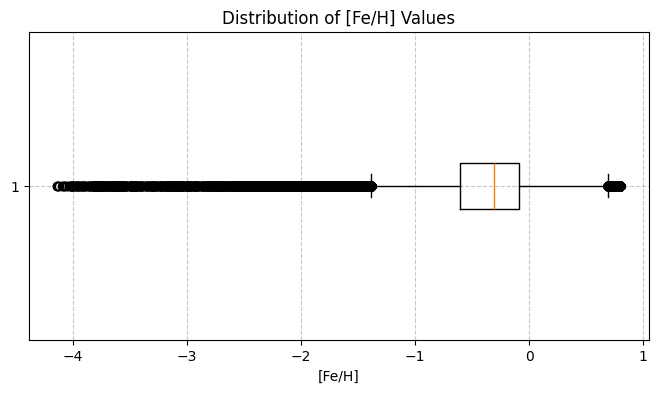

In [81]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['[Fe/H]'].dropna(), vert=False)
plt.title("Distribution of [Fe/H] Values")
plt.xlabel("[Fe/H]")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.15) `Rad` → radius  
Rad is a variable that represents the **stellar radius**, measuring the size of a star, usually in units of solar radii (R☉). Higher values indicate larger stars, while lower values indicate smaller stars.


In [82]:
# Missing Values
missing_values = Dataframe['Rad'].isnull().sum()
print(f"Missing values in 'rad': {missing_values}")

total_values = len(Dataframe['Rad'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'rad': 0
Percentage of missing values: 0.00000%


In [83]:
# describtion 
Dataframe['Rad'].describe()

count    626016.000000
mean          8.030661
std          27.666678
min           0.345400
25%           1.345000
50%           2.056100
75%           4.007600
max        1105.995600
Name: Rad, dtype: float64

In [84]:
# Doublicates
duplicates = Dataframe['Rad'].duplicated().sum()
print(f"Number of duplicate entries in 'Rad': {duplicates}")

Number of duplicate entries in 'Rad': 485636


We checked for duplicate stellar radius values (`Rad`). Duplicates are expected, many stars can share the same radius, especially if they are similar types of stars or at comparable evolutionary stages. Repeated values in `Rad` do not indicate that the stars themselves are duplicates.


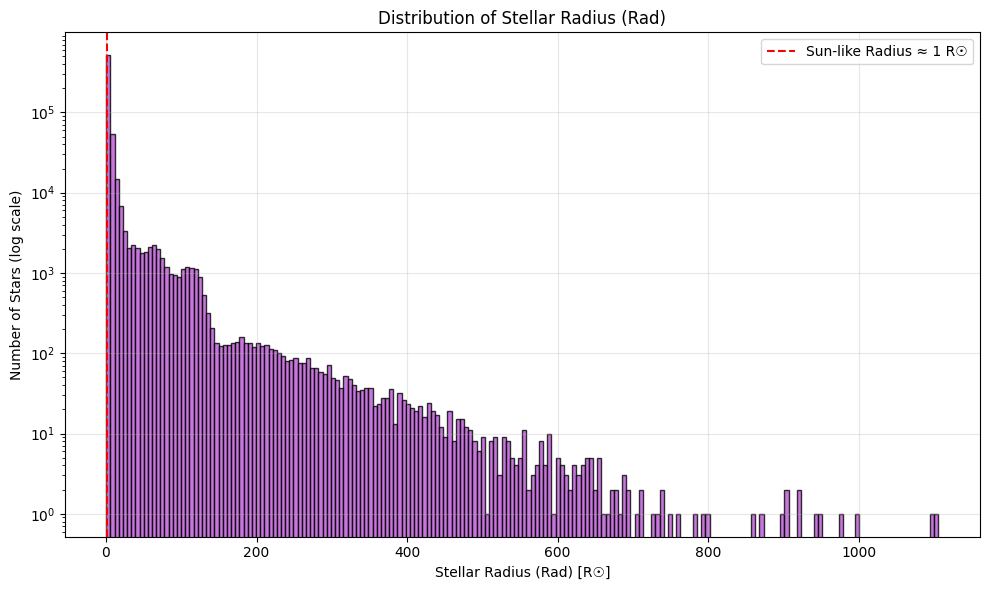

In [85]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Rad'], bins=200, color='mediumorchid', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Stellar Radius (Rad) [R☉]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Radius (Rad)')
plt.axvline(1, color='red', linestyle='--', label='Sun-like Radius ≈ 1 R☉')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


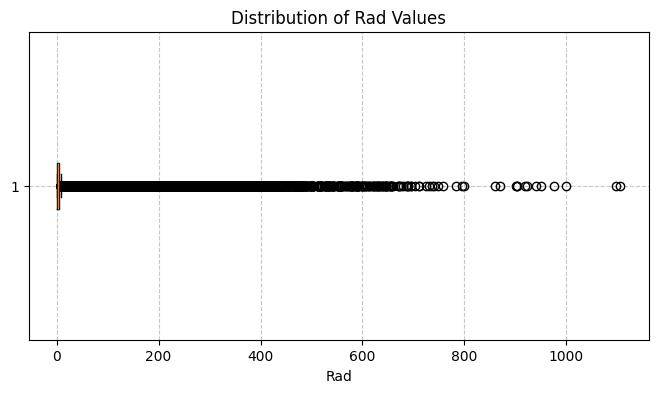

In [86]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Rad'].dropna(), vert=False)
plt.title("Distribution of Rad Values")
plt.xlabel("Rad")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.16) `Lum-Flame` → luminosity
Lum-Flame is a variable that represents the **stellar luminosity**, measuring the total amount of energy a star emits per unit time, usually in units of solar luminosity (L☉). Higher values indicate brighter stars, while lower values indicate dimmer stars.


In [87]:
# Missing Values
missing_values = Dataframe['Lum-Flame'].isnull().sum()
print(f"Missing values in 'Lum-Flame': {missing_values}")

total_values = len(Dataframe['Lum-Flame'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Lum-Flame': 14723
Percentage of missing values: 2.35186%


We checked for missing luminosity values (`Lum-Flame`). Missing values are expected in astronomical datasets due to observational limits or data processing gaps. About 2.35% of the stars lack `Lum-Flame` measurements, which should be considered when analyzing stellar luminosities.

In [88]:
# describtion 
Dataframe['Lum-Flame'].describe()

count    611293.000000
mean        114.628554
std         330.115307
min           0.034732
25%           2.066952
50%          11.679550
75%          60.254990
max        3499.921000
Name: Lum-Flame, dtype: float64

In [89]:
# Doublicates
duplicates = Dataframe['Lum-Flame'].duplicated().sum()
print(f"Number of duplicate entries in 'Lum-Flame': {duplicates}")

Number of duplicate entries in 'Lum-Flame': 16623


We checked for duplicate luminosity values (`Lum-Flame`). Duplicates are expected—many stars can share the same luminosity, especially if they are similar types of stars or at comparable evolutionary stages. Repeated values in `Lum-Flame` do not indicate that the stars themselves are duplicates.

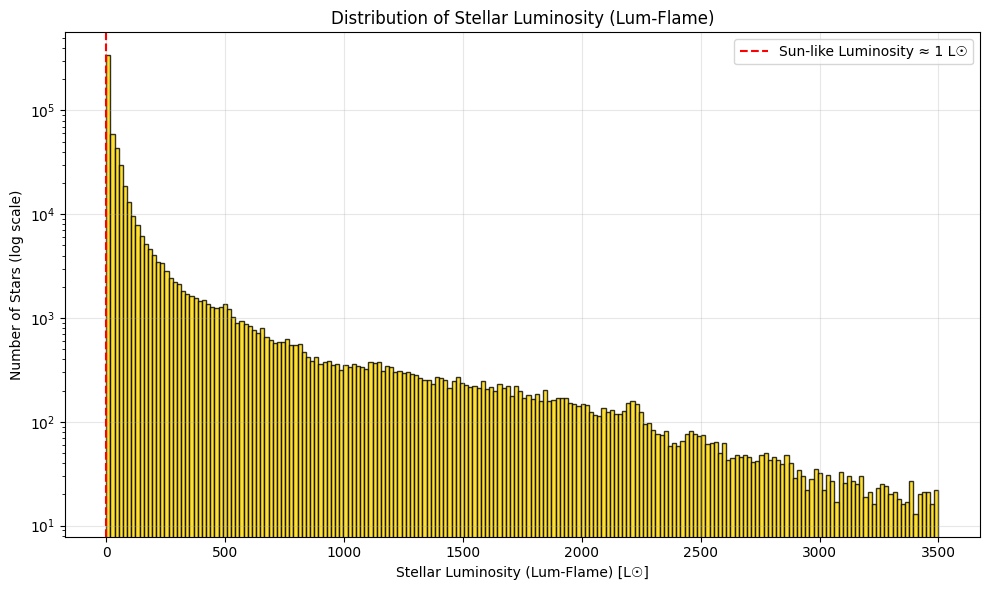

In [90]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Lum-Flame'], bins=200, color='gold', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Stellar Luminosity (Lum-Flame) [L☉]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Luminosity (Lum-Flame)')
plt.axvline(1, color='red', linestyle='--', label='Sun-like Luminosity ≈ 1 L☉')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


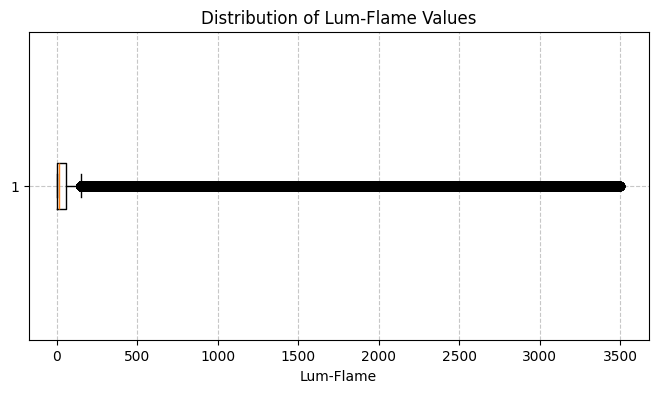

In [91]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Lum-Flame'].dropna(), vert=False)
plt.title("Distribution of Lum-Flame Values")
plt.xlabel("Lum-Flame")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.17) `Mass-Flame` → mass 
Mass-Flame is a variable that represents the **stellar mass**, measuring the amount of matter contained in a star, usually in units of solar mass (M☉). Higher values indicate more massive stars, while lower values indicate less massive stars.


In [92]:
# Missing Values
missing_values = Dataframe['Mass-Flame'].isnull().sum()
print(f"Missing values in 'Mass-Flame': {missing_values}")

total_values = len(Dataframe['Mass-Flame'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Mass-Flame': 35220
Percentage of missing values: 5.62605%


We checked for missing mass values (`Mass-Flame`). Missing values are expected in astronomical datasets due to observational limits or data processing gaps. About 5.63% of the stars lack `Mass-Flame` measurements, which should be considered when analyzing stellar masses.

In [93]:
# describtion 
Dataframe['Mass-Flame'].describe()

count    590796.000000
mean          1.841872
std           1.004918
min           0.500000
25%           1.041000
50%           1.649000
75%           2.462000
max           7.521000
Name: Mass-Flame, dtype: float64

In [94]:
# Doublicates
duplicates = Dataframe['Mass-Flame'].duplicated().sum()
print(f"Number of duplicate entries in 'Mass-Flame': {duplicates}")

Number of duplicate entries in 'Mass-Flame': 619607


We checked for duplicate mass values (`Mass-Flame`). Duplicates are expected—many stars can share the same mass, especially if they are similar types of stars or at comparable evolutionary stages. Repeated values in `Mass-Flame` do not indicate that the stars themselves are duplicates.

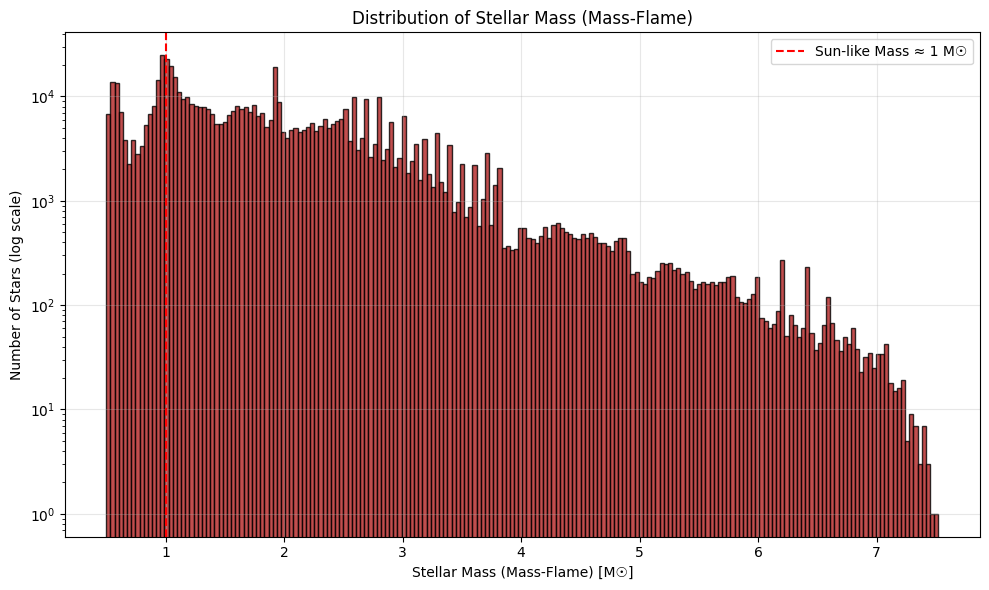

In [95]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Mass-Flame'], bins=200, color='firebrick', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Stellar Mass (Mass-Flame) [M☉]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Mass (Mass-Flame)')
plt.axvline(1, color='red', linestyle='--', label='Sun-like Mass ≈ 1 M☉')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


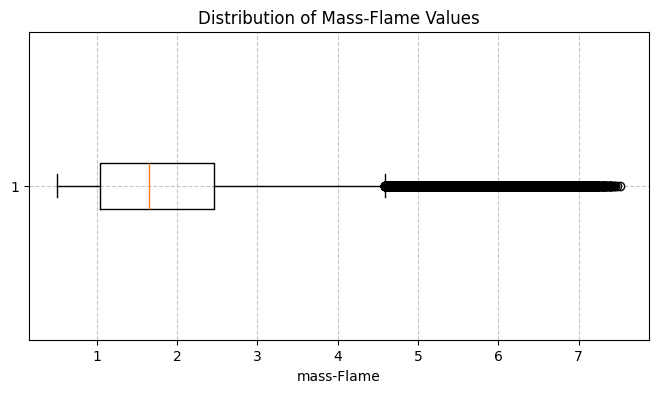

In [96]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Mass-Flame'].dropna(), vert=False)
plt.title("Distribution of Mass-Flame Values")
plt.xlabel("mass-Flame")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.18) `Age-Flame` → age  
Age-Flame is a variable that represents the **stellar age**, measuring how long a star has existed, usually in billions of years (Gyr). Higher values indicate older stars, while lower values indicate younger stars.

In [97]:
# Missing Values
missing_values = Dataframe['Age-Flame'].isnull().sum()
print(f"Missing values in 'Age-Flame': {missing_values}")

total_values = len(Dataframe['Age-Flame'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Age-Flame': 81335
Percentage of missing values: 12.99248%


We checked for missing age values (`Age-Flame`). Missing values are expected in astronomical datasets due to observational limits or data processing gaps. The calculated percentage indicates how many stars lack age measurements, which should be considered when analyzing stellar ages.

In [98]:
# describtion 
Dataframe['Age-Flame'].describe()

count    544681.000000
mean          3.776435
std           4.139873
min           0.200000
25%           0.524000
50%           1.448000
75%           6.629000
max          13.500000
Name: Age-Flame, dtype: float64

In [99]:
# Doublicates
duplicates = Dataframe['Age-Flame'].duplicated().sum()
print(f"Number of duplicate entries in 'Age-Flame': {duplicates}")

Number of duplicate entries in 'Age-Flame': 612714


We checked for duplicate age values (`Age-Flame`). Duplicates are expected—many stars can share the same age, especially if they formed in similar clusters or star-forming regions. Repeated values in `Age-Flame` do not indicate that the stars themselves are duplicates.

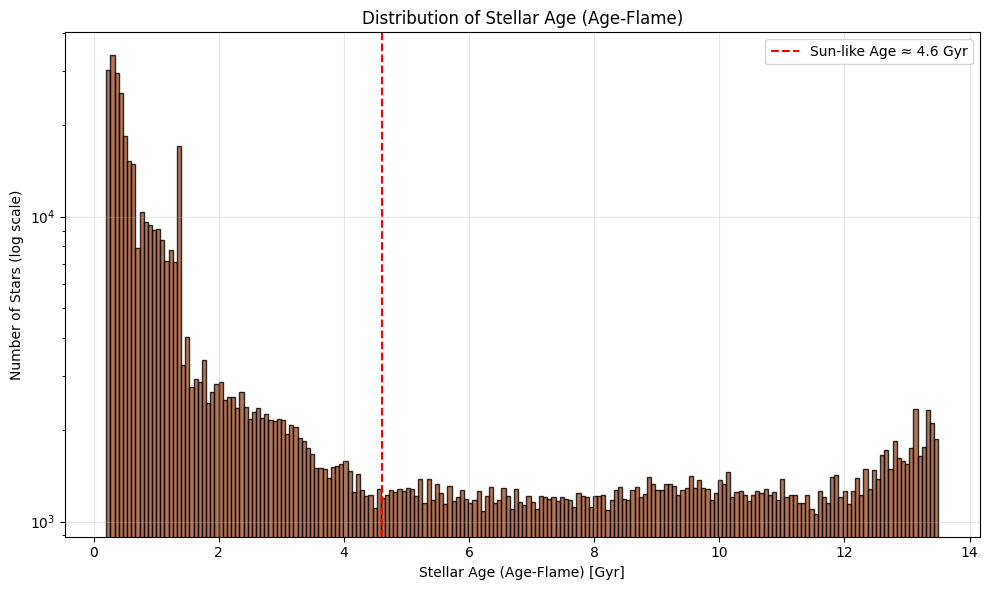

In [100]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Age-Flame'], bins=200, color='sienna', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Stellar Age (Age-Flame) [Gyr]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Age (Age-Flame)')
plt.axvline(4.6, color='red', linestyle='--', label='Sun-like Age ≈ 4.6 Gyr')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

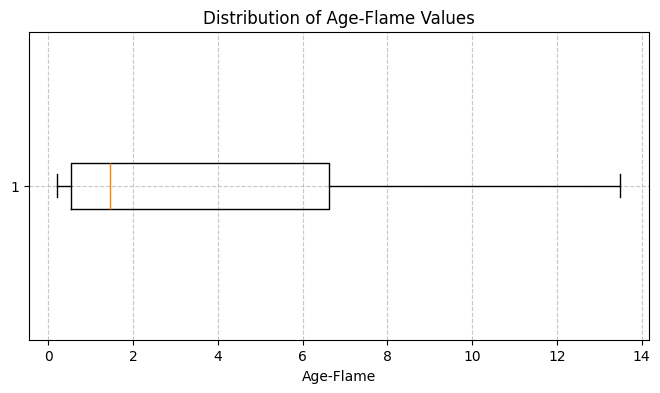

In [101]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Age-Flame'].dropna(), vert=False)
plt.title("Distribution of Age-Flame Values")
plt.xlabel("Age-Flame")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.19) `SpType-ELS` → spectral type  
SpType-ELS is a variable that represents the **stellar spectral type**, classifying stars based on their temperature, color, and spectral features. It categorizes stars into types such as O, B, A, F, G, K, and M, with O being the hottest and M being the coolest.

The main stellar spectral classes are:

- **O** – Very hot, blue stars
- **B** – Hot, blue-white stars
- **A** – White stars
- **F** – Yellow-white stars
- **G** – Yellow stars (like the Sun)
- **K** – Orange stars
- **M** – Red, cool stars



In [102]:
# Missing Values
missing_values = Dataframe['SpType-ELS'].isnull().sum()
print(f"Missing values in 'SpType-ELS': {missing_values}")

total_values = len(Dataframe['SpType-ELS'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'SpType-ELS': 0
Percentage of missing values: 0.00000%


In [103]:
# describtion 
Dataframe['SpType-ELS'].describe()

count      626016
unique          7
top       B      
freq       100000
Name: SpType-ELS, dtype: object

In [104]:
# Doublicates
duplicates = Dataframe['SpType-ELS'].duplicated().sum()
print(f"Number of duplicate entries in 'SpType-ELS': {duplicates}")

Number of duplicate entries in 'SpType-ELS': 626009


We checked for duplicate spectral type values (`SpType-ELS`). Duplicates are expected—many stars can share the same spectral type, especially if they have similar temperatures and compositions. Repeated values in `SpType-ELS` do not indicate that the stars themselves are duplicates.


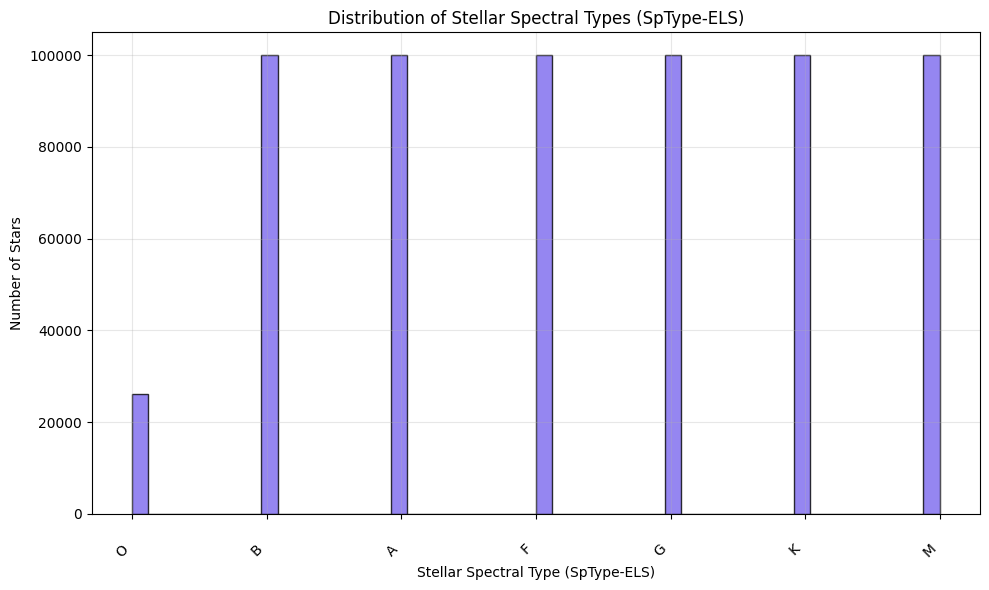

In [105]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['SpType-ELS'], bins=50, color='mediumslateblue', edgecolor='black', alpha=0.8)
plt.xlabel('Stellar Spectral Type (SpType-ELS)')
plt.ylabel('Number of Stars')
plt.title('Distribution of Stellar Spectral Types (SpType-ELS)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [106]:
keep_end = time.time()
keep_elapsed = keep_end - keep_start

---
### Variables to Reconsider / Simplify
---

In [107]:
# =============================
# ⚠️ Reconsider section
# =============================
reconsider_start = time.time()

### 3.20) `GRVSmag` → radial velocity magnitude  
**Definition:**  
`GRVSmag` is a variable that represents the **radial velocity magnitude** of a star, measuring how fast the star is moving toward or away from the observer along the line of sight. Positive values indicate the star is moving away, and negative values indicate it is approaching.  

**Poppy Universe Consideration:**  
For the Poppy Universe star recommendation engine, we might simplify or categorize `GRVSmag` rather than use precise values, since tiny velocity differences are unlikely to affect user-friendly recommendations. For example, we could classify stars as “approaching,” “receding,” or “stationary” to make the data more intuitive.



In [108]:
# Missing Values
missing_values = Dataframe['GRVSmag'].isnull().sum()
print(f"Missing values in 'GRVSmag': {missing_values}")

total_values = len(Dataframe['GRVSmag'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'GRVSmag': 116307
Percentage of missing values: 18.57892%


We checked for missing radial velocity values (`GRVSmag`). Missing values are expected in astronomical datasets due to observational limits or measurement difficulties. About 18.58% of the stars lack `GRVSmag` measurements, which should be considered when building the Poppy Universe recommendation engine. Missing values could be handled by categorizing them as “unknown” or by ignoring them in velocity-based recommendations.


In [109]:
# describtion 
Dataframe['GRVSmag'].describe()

count    509709.000000
mean         12.415666
std           1.361668
min           2.856422
25%          11.654520
50%          12.835275
75%          13.474037
max          14.099996
Name: GRVSmag, dtype: float64

In [110]:
# Doublicates
duplicates = Dataframe['GRVSmag'].duplicated().sum()
print(f"Number of duplicate entries in 'GRVSmag': {duplicates}")

Number of duplicate entries in 'GRVSmag': 154069


We checked for duplicate radial velocity values (`GRVSmag`). Duplicates are expected—many stars can share the same radial velocity, especially if they belong to similar stellar populations or clusters. Repeated values in `GRVSmag` do not indicate that the stars themselves are duplicates and can be safely handled in the Poppy Universe recommendation engine.

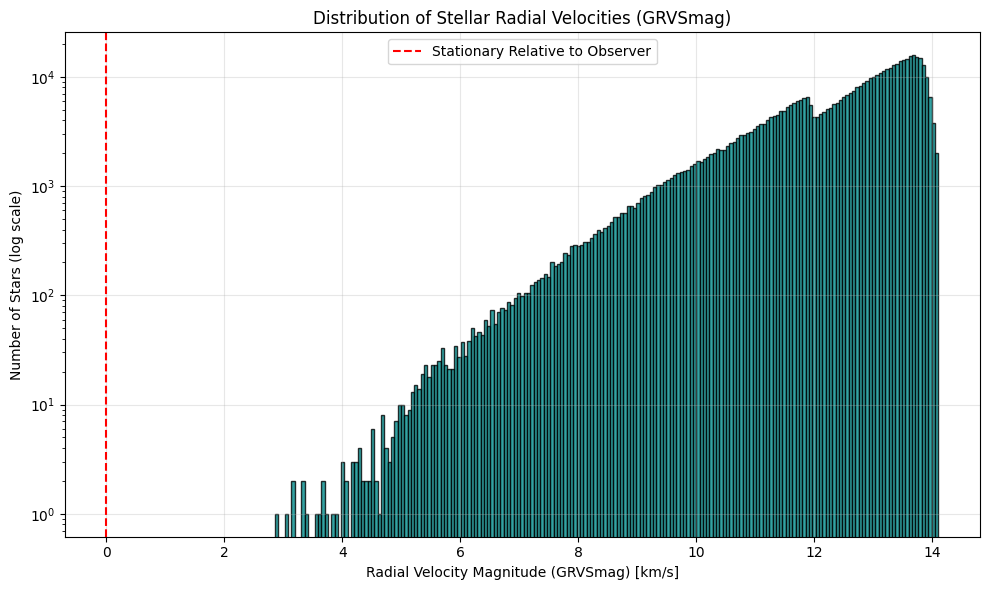

In [111]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['GRVSmag'], bins=200, color='darkcyan', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Radial Velocity Magnitude (GRVSmag) [km/s]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Radial Velocities (GRVSmag)')
plt.axvline(0, color='red', linestyle='--', label='Stationary Relative to Observer')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


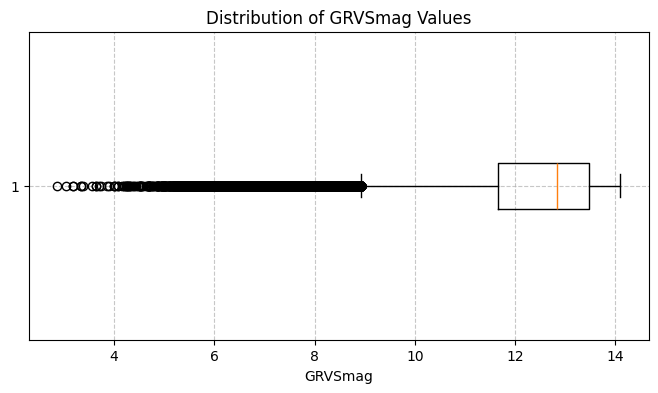

In [112]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['GRVSmag'].dropna(), vert=False)
plt.title("Distribution of GRVSmag Values")
plt.xlabel("GRVSmag")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`GRVSmag` might provide interesting insights for certain star recommendations, such as identifying stars moving toward or away from the observer. However, since about 18.58% of the data is missing and there are a large number of duplicate values, it may not be reliable for fine-grained filtering. For Poppy Universe, it could be included in a simplified form (e.g., categorized as “approaching,” “receding,” or “unknown”) rather than using precise velocity values.

### 3.21) `RV` → radial velocity 
**Definition:**  
`RV` is a variable that represents the **radial velocity** of a star, measuring the speed at which the star moves toward or away from the observer along the line of sight. Positive values indicate the star is receding, while negative values indicate it is approaching.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, `RV` could provide interesting context for stellar motion, but due to potential missing values or repeated measurements, it may be better to simplify. For example, we could categorize stars as “approaching,” “receding,” or “unknown” rather than using precise velocity values.


In [113]:
# Missing Values
missing_values = Dataframe['RV'].isnull().sum()
print(f"Missing values in 'RV': {missing_values}")

total_values = len(Dataframe['RV'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'RV': 115668
Percentage of missing values: 18.47684%


We checked for missing radial velocity values (`RV`). Missing values are expected in astronomical datasets due to observational limits or measurement difficulties. About 18.48% of the stars lack `RV` measurements, which suggests caution if including it in the Poppy Universe recommendation engine. Missing values could be handled by categorizing them as “unknown” or by ignoring them in velocity-based recommendations.

In [114]:
# describtion 
Dataframe['RV'].describe()

count    510348.000000
mean         -5.882808
std          41.978304
min        -885.200000
25%         -26.390000
50%          -4.970000
75%          17.120000
max         808.890000
Name: RV, dtype: float64

In [115]:
# Doublicates
duplicates = Dataframe['RV'].duplicated().sum()
print(f"Number of duplicate entries in 'RV': {duplicates}")

Number of duplicate entries in 'RV': 596201


We checked for duplicate radial velocity values (`RV`). Duplicates are expected—many stars can share the same radial velocity, especially if they belong to similar stellar populations or clusters. Repeated values in `RV` do not indicate that the stars themselves are duplicates and can be handled appropriately in the Poppy Universe recommendation engine.

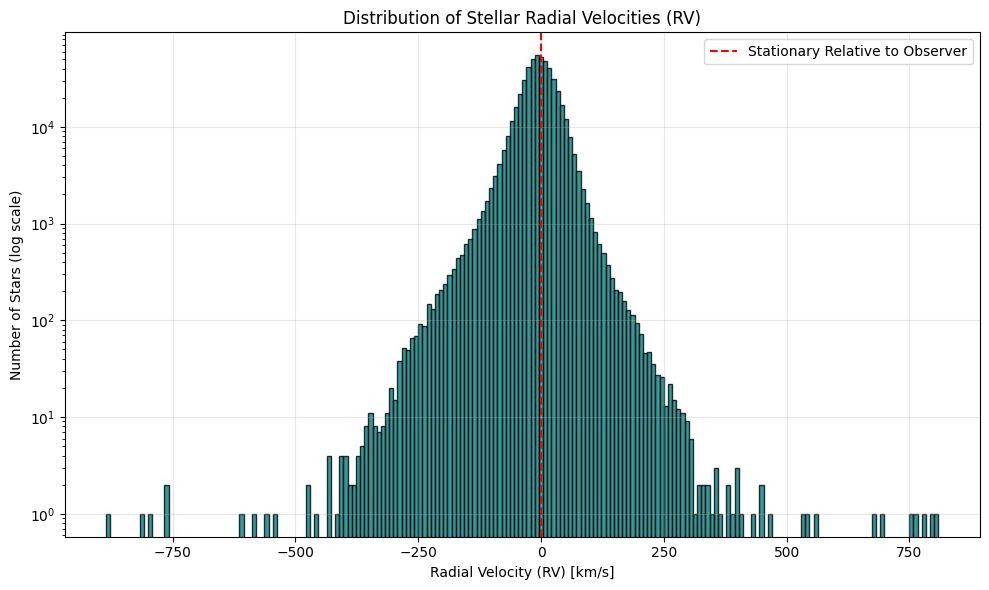

In [116]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['RV'], bins=200, color='teal', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Radial Velocity (RV) [km/s]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Radial Velocities (RV)')
plt.axvline(0, color='red', linestyle='--', label='Stationary Relative to Observer')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


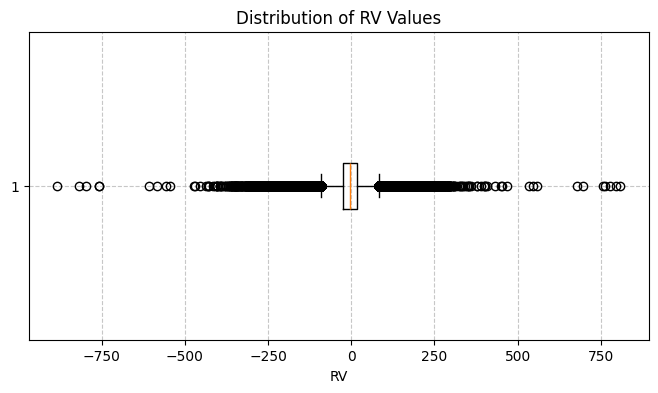

In [117]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['RV'].dropna(), vert=False)
plt.title("Distribution of RV Values")
plt.xlabel("RV")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`RV` might provide interesting insights for star recommendations, such as identifying stars moving toward or away from the observer. However, about 18.48% of the data is missing and there are a large number of duplicate values (596,201), making it less reliable for precise filtering. For Poppy Universe, it could be included in a simplified form—categorizing stars as “approaching,” “receding,” or “unknown”—rather than using exact radial velocity values.

### 3.22) `z-Flame` → redshift / derived parameter  
**Definition:**  
`z-Flame` is a variable that represents the **redshift** of a star, which measures how much the star’s light is stretched due to its motion away from the observer or the expansion of space. It is a derived parameter that can be used to estimate distance or relative motion.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, precise redshift values may not be necessary, since users are unlikely to filter stars based on tiny differences in redshift. We could simplify `z-Flame` by categorizing stars into broad groups, such as “nearby,” “moderate distance,” or “far,” making the data more intuitive for recommendations.


In [118]:
# Missing Values
missing_values = Dataframe['z-Flame'].isnull().sum()
print(f"Missing values in 'z-Flame': {missing_values}")

total_values = len(Dataframe['z-Flame'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'z-Flame': 14723
Percentage of missing values: 2.35186%


We checked for missing redshift values (`z-Flame`). Missing values are expected due to observational limits or data processing gaps. About 2.35% of the stars lack `z-Flame` measurements, which should be considered for the Poppy Universe recommendation engine. Missing values could be categorized as “unknown” or handled by ignoring them in distance-based recommendations.

In [119]:
# describtion 
Dataframe['z-Flame'].describe()

count    611293.000000
mean          0.445233
std           0.233019
min           0.001505
25%           0.313836
50%           0.480814
75%           0.570397
max           1.616032
Name: z-Flame, dtype: float64

In [120]:
# Doublicates
duplicates = Dataframe['z-Flame'].duplicated().sum()
print(f"Number of duplicate entries in 'z-Flame': {duplicates}")

Number of duplicate entries in 'z-Flame': 27453


We checked for duplicate redshift values (`z-Flame`). Duplicates are expected—many stars can share the same redshift, especially if they are at similar distances or in the same stellar population. Repeated values in `z-Flame` do not indicate duplicate stars and can be handled appropriately in the Poppy Universe recommendation engine.

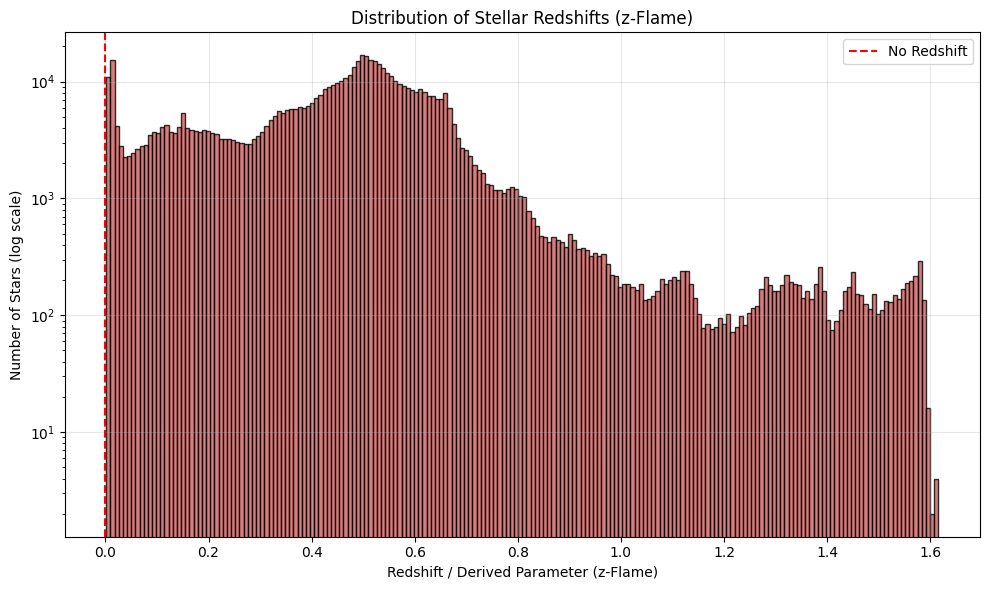

In [121]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['z-Flame'], bins=200, color='indianred', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Redshift / Derived Parameter (z-Flame)')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Redshifts (z-Flame)')
plt.axvline(0, color='red', linestyle='--', label='No Redshift')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


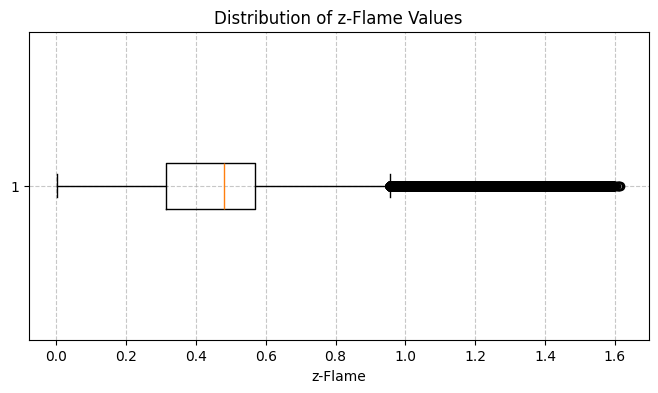

In [122]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['z-Flame'].dropna(), vert=False)
plt.title("Distribution of z-Flame Values")
plt.xlabel("z-Flame")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`z-Flame` could be useful for approximating stellar distances or motion in the Poppy Universe recommendation engine. However, since about 2.35% of values are missing and there are some duplicate entries (27,453), precise redshift values may not be critical. For user-friendly recommendations, we could simplify `z-Flame` by categorizing stars into broad distance groups, such as “nearby,” “moderate distance,” or “far,” rather than using exact redshift values.

### 3.23)`Evol` → evolutionary stage code  
**Definition:**  
`Evol` is a variable that represents the **evolutionary stage** of a star, often coded numerically or categorically. It indicates whether a star is on the main sequence, a giant, a supergiant, or in another phase of its stellar evolution.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, detailed evolutionary codes might be too technical for users. It may be better to simplify `Evol` into broad categories like “young/main sequence,” “giant,” or “old/advanced,” making it easier to recommend stars based on general evolutionary stages without overwhelming users with technical codes.


In [123]:
# Missing Values
missing_values = Dataframe['Evol'].isnull().sum()
print(f"Missing values in 'Evol': {missing_values}")

total_values = len(Dataframe['Evol'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Evol': 35219
Percentage of missing values: 5.62589%


We checked for missing evolutionary stage values (`Evol`). Missing values are expected due to observational limits or incomplete data. About 5.63% of the stars lack `Evol` measurements, which should be considered when building the Poppy Universe recommendation engine. Missing values could be categorized as “unknown” or handled by excluding them from evolution-based recommendations.

In [124]:
# describtion 
Dataframe['Evol'].describe()

count    590797.000000
mean        364.190439
std         238.863381
min         100.000000
25%         216.000000
50%         286.000000
75%         457.000000
max        1735.000000
Name: Evol, dtype: float64

In [125]:
# Doublicates
duplicates = Dataframe['Evol'].duplicated().sum()
print(f"Number of duplicate entries in 'Evol': {duplicates}")

Number of duplicate entries in 'Evol': 624812


We checked for duplicate evolutionary stage values (`Evol`). Duplicates are expected—many stars share the same evolutionary stage, especially if they belong to similar populations. Repeated values in `Evol` do not indicate duplicate stars and can be safely handled in the Poppy Universe recommendation engine.

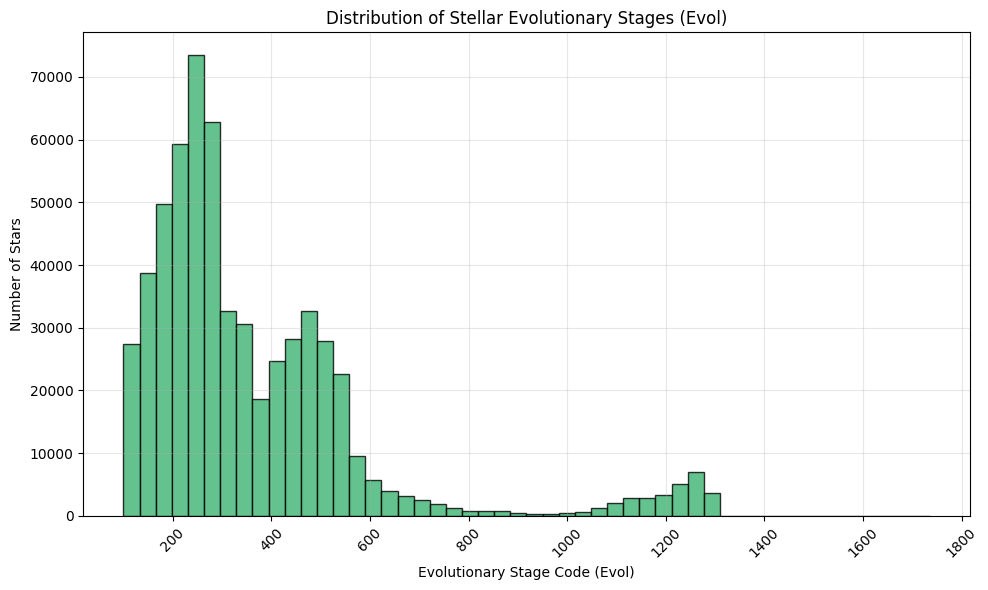

In [126]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Evol'], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.8)
plt.xlabel('Evolutionary Stage Code (Evol)')
plt.ylabel('Number of Stars')
plt.title('Distribution of Stellar Evolutionary Stages (Evol)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


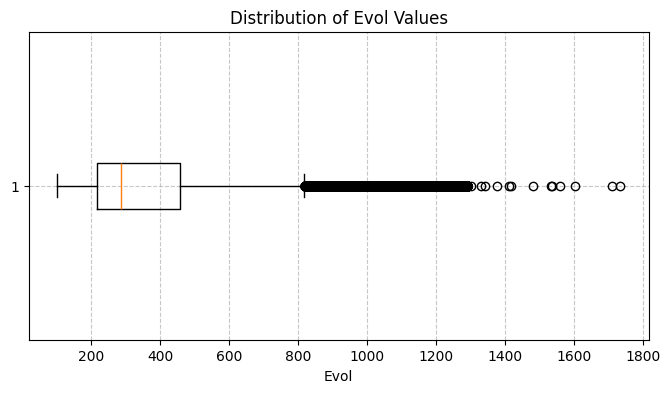

In [127]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Evol'].dropna(), vert=False)
plt.title("Distribution of Evol Values")
plt.xlabel("Evol")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`Evol` encodes the evolutionary stage of stars numerically. While the exact codes may be too technical for users, they still provide useful information about a star’s development. For the Poppy Universe recommendation engine, we could simplify `Evol` by grouping the numeric codes into broad categories or using them as-is for internal filtering, while presenting more user-friendly labels or descriptions in the interface.

### 3.24) `A0`, `AG`, `ABP`, `ARP`, `E(BP-RP)` → extinction / reddening corrections 
**Definition:**  
`A0`, `AG`, `ABP`, `ARP`, and `E(BP-RP)` are variables related to **extinction and reddening corrections** in stellar observations. They quantify how dust and gas in the interstellar medium absorb and scatter light, dimming stars (extinction) and making them appear redder (reddening). Each variable corresponds to different bands or measures:  
- `A0` – overall extinction  
- `AG` – extinction in the Gaia G-band  
- `ABP` – extinction in the BP (blue) band  
- `ARP` – extinction in the RP (red) band  
- `E(BP-RP)` – color excess, measuring reddening between BP and RP  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, exact extinction values may not be crucial for general star recommendations. It may be better to simplify these parameters or apply pre-corrections to brightness and color values so that users see intuitive stellar properties without needing to interpret technical extinction measures.


In [128]:
# Missing Values
extinction_columns = ['A0', 'AG', 'ABP', 'ARP', 'E(BP-RP)']

for col in extinction_columns:
    missing_values = Dataframe[col].isnull().sum()
    total_values = len(Dataframe[col])
    percent_missing = (missing_values / total_values) * 100
    print(f"Missing values in '{col}': {missing_values}")
    print(f"Percentage of missing values: {percent_missing:.5f}%\n")


Missing values in 'A0': 0
Percentage of missing values: 0.00000%

Missing values in 'AG': 0
Percentage of missing values: 0.00000%

Missing values in 'ABP': 0
Percentage of missing values: 0.00000%

Missing values in 'ARP': 0
Percentage of missing values: 0.00000%

Missing values in 'E(BP-RP)': 0
Percentage of missing values: 0.00000%



In [129]:
for col in extinction_columns:
    # describtion 
    print(Dataframe[col].describe(), "\n")

count    626016.000000
mean          1.439635
std           1.465222
min           0.000000
25%           0.489000
50%           0.930400
75%           1.972000
max          10.000000
Name: A0, dtype: float64 

count    626016.000000
mean          1.134374
std           1.060210
min           0.000000
25%           0.401300
50%           0.770100
75%           1.611000
max           7.185600
Name: AG, dtype: float64 

count    626016.000000
mean          1.466110
std           1.424287
min           0.000000
25%           0.512400
50%           0.972300
75%           2.052700
max           9.754800
Name: ABP, dtype: float64 

count    626016.000000
mean          0.841649
std           0.827668
min           0.000000
25%           0.291900
50%           0.554700
75%           1.171100
max           5.640000
Name: ARP, dtype: float64 

count    626016.000000
mean          0.624461
std           0.598200
min           0.000000
25%           0.219600
50%           0.417200
75%           0.

In [130]:
# Duplicates
for col in extinction_columns:
    duplicates = Dataframe[col].duplicated().sum()
    print(f"Number of duplicate entries in '{col}': {duplicates}")

Number of duplicate entries in 'A0': 563728
Number of duplicate entries in 'AG': 576267
Number of duplicate entries in 'ABP': 564045
Number of duplicate entries in 'ARP': 584579
Number of duplicate entries in 'E(BP-RP)': 594034


We checked for duplicate extinction and reddening values (`A0`, `AG`, `ABP`, `ARP`, `E(BP-RP)`). Duplicates are expected—many stars can share the same extinction or reddening values, especially if they are in similar regions of space. Repeated values do not indicate duplicate stars and can be safely handled in the Poppy Universe recommendation engine, possibly by applying simplified corrections or using pre-corrected brightness and color values for recommendations.


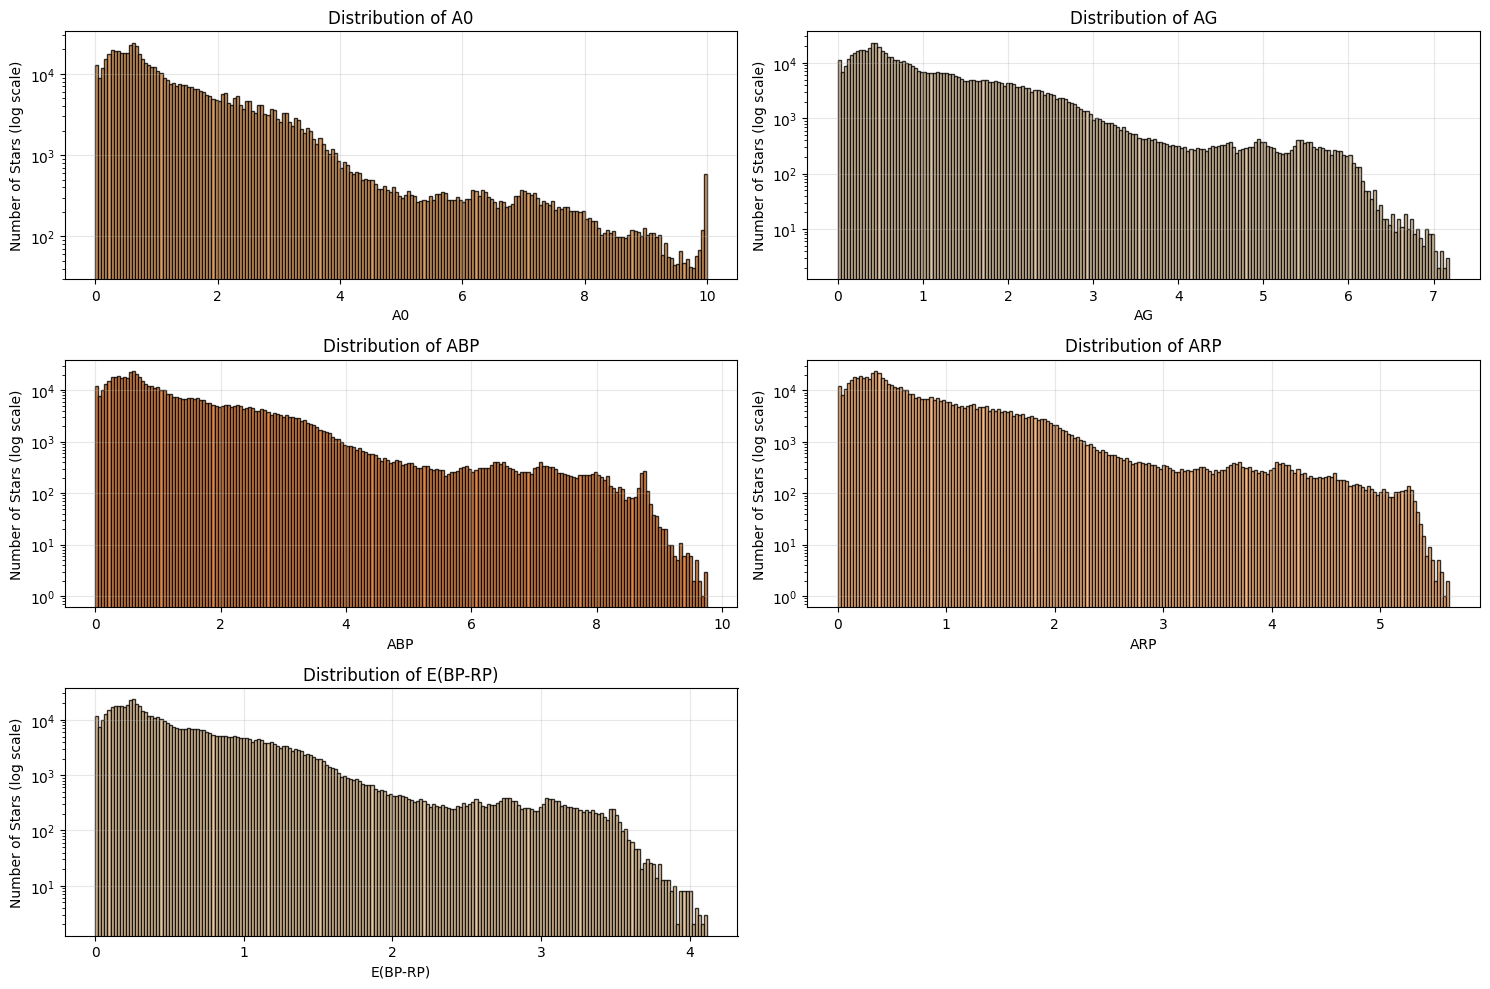

In [131]:
plt.figure(figsize=(15,10))

extinction_columns = ['A0', 'AG', 'ABP', 'ARP', 'E(BP-RP)']
colors_extinction = ['peru', 'tan', 'chocolate', 'sandybrown', 'burlywood']

for i, col in enumerate(extinction_columns):
    plt.subplot(3, 2, i+1)
    plt.hist(Dataframe[col], bins=200, color=colors_extinction[i], edgecolor='black', alpha=0.8, log=True)
    plt.xlabel(f'{col}')
    plt.ylabel('Number of Stars (log scale)')
    plt.title(f'Distribution of {col}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


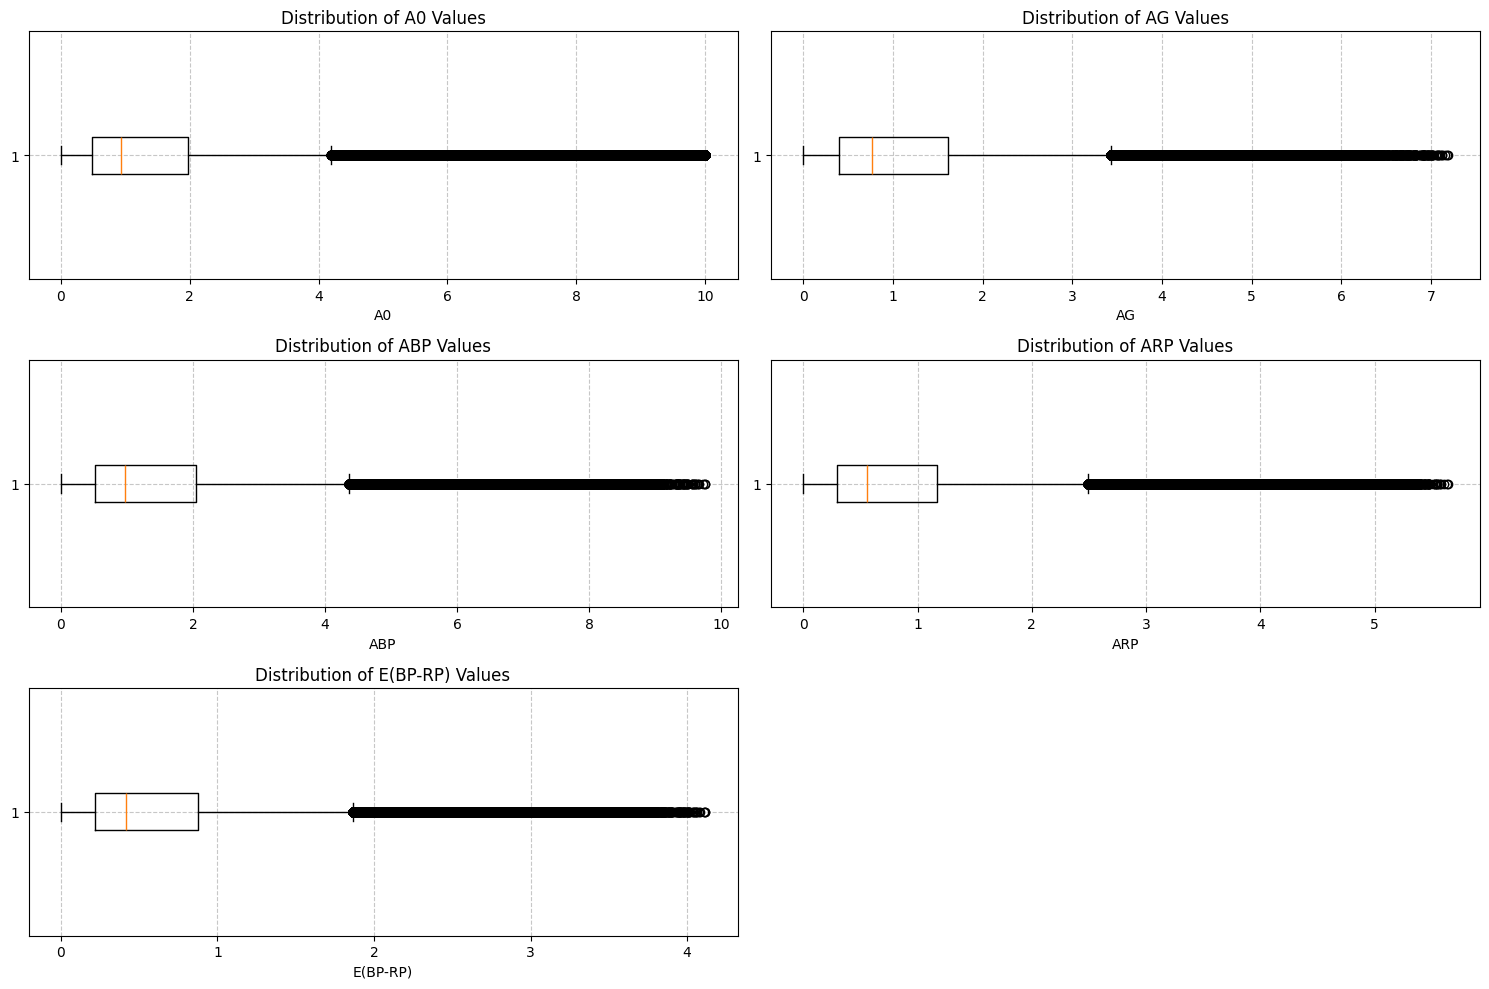

In [132]:
plt.figure(figsize=(15,10))

for i, col in enumerate(extinction_columns):
    plt.subplot(3, 2, i+1)
    # Boxplot for distribution
    plt.boxplot(Dataframe[col].dropna(), vert=False)
    plt.title(f"Distribution of {col} Values")
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Consideration for Poppy Universe:**  
The extinction and reddening parameters (`A0`, `AG`, `ABP`, `ARP`, `E(BP-RP)`) have no missing values and only contain expected duplicate entries. These variables are useful for correcting stellar brightness and color, but for the Poppy Universe recommendation engine, it may be more practical to use pre-corrected values or simplified categories. This ensures users see intuitive star properties without needing to interpret detailed extinction or reddening corrections.


### 3.25) `RUWE` → Gaia astrometric fit quality  
**Definition:**  
`RUWE` (Renormalized Unit Weight Error) is a variable that represents the **Gaia astrometric fit quality**. It indicates how well the observed positions of a star fit the Gaia astrometric model. Values close to 1 suggest a good fit, while larger values may indicate problematic or uncertain measurements.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, `RUWE` can help identify stars with reliable measurements. However, precise RUWE values may not be necessary for users. It could be simplified by flagging stars as “reliable” (RUWE ≈ 1) or “potentially unreliable” (RUWE > 1.4), ensuring recommendations prioritize stars with trustworthy data.


In [133]:
# Missing Values
missing_values = Dataframe['RUWE'].isnull().sum()
print(f"Missing values in 'RUWE': {missing_values}")

total_values = len(Dataframe['RUWE'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'RUWE': 0
Percentage of missing values: 0.00000%


In [134]:
# describtion 
Dataframe['RUWE'].describe()

count    626016.000000
mean          1.476731
std           2.211868
min           0.462000
25%           0.986000
50%           1.036000
75%           1.129000
max          80.725000
Name: RUWE, dtype: float64

In [135]:
# Doublicates
duplicates = Dataframe['RUWE'].duplicated().sum()
print(f"Number of duplicate entries in 'RUWE': {duplicates}")

Number of duplicate entries in 'RUWE': 611192


We checked for duplicate Gaia astrometric fit quality values (`RUWE`). Duplicates are expected, many stars can have similar fit quality. Repeated values do not indicate duplicate stars and can be safely handled in the Poppy Universe recommendation engine, for example by using them to flag stars as “reliable” or “potentially unreliable.”

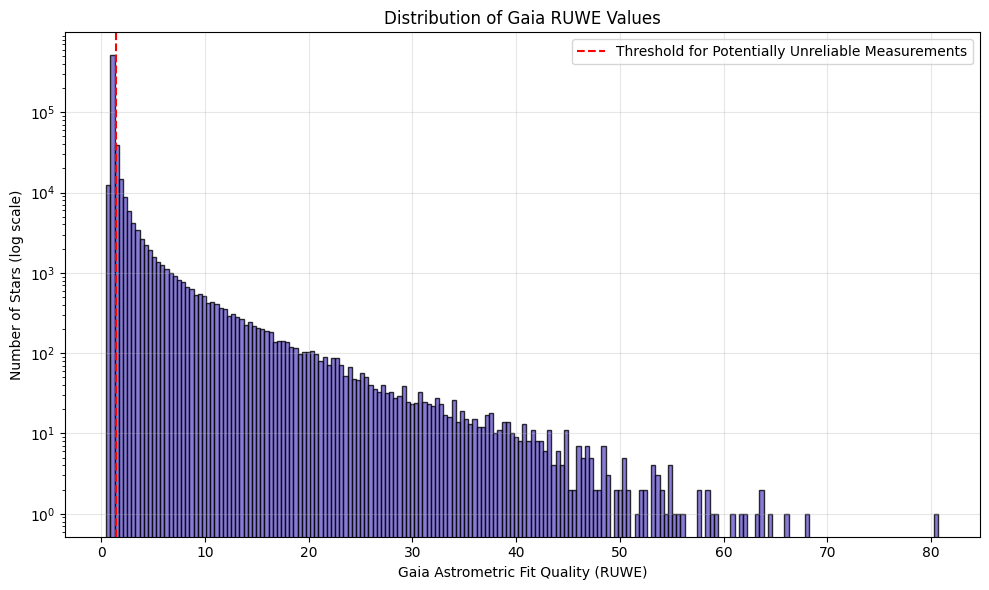

In [136]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['RUWE'], bins=200, color='slateblue', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Gaia Astrometric Fit Quality (RUWE)')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Gaia RUWE Values')
plt.axvline(1.4, color='red', linestyle='--', label='Threshold for Potentially Unreliable Measurements')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


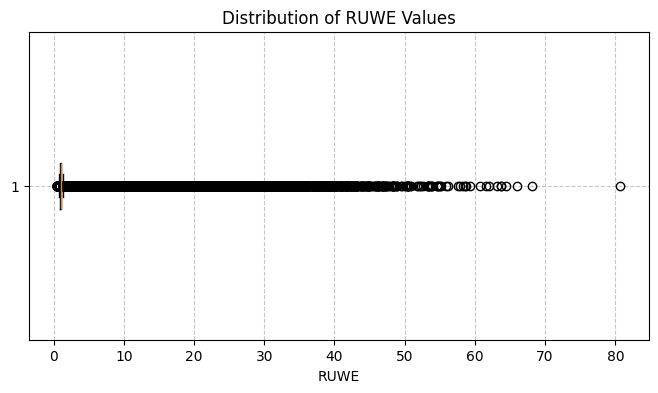

In [137]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['RUWE'].dropna(), vert=False)
plt.title("Distribution of RUWE Values")
plt.xlabel("RUWE")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`RUWE` provides information about the reliability of Gaia astrometric measurements. Since there are no missing values and only expected duplicates, it can be safely used in the Poppy Universe recommendation engine. For simplicity, stars could be flagged as “reliable” (RUWE ≈ 1) or “potentially unreliable” (RUWE > 1.4), helping the engine prioritize stars with trustworthy astrometry without overwhelming users with exact numerical values.

### 3.26) `Rad-Flame` → radius from FLAME pipeline
**Definition:**  
`Rad-Flame` is a variable that represents the **stellar radius** as derived from the Gaia FLAME pipeline. It estimates the physical size of a star, typically in units of solar radii (R☉). Larger values indicate bigger stars, while smaller values indicate smaller stars.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, `Rad-Flame` can help distinguish between small, medium, and large stars for recommendations. Exact values may not be necessary—simplifying into broad categories like “small,” “medium,” and “large” makes the data more intuitive and user-friendly while still preserving meaningful distinctions between stars.


In [138]:
# Missing Values
missing_values = Dataframe['Rad-Flame'].isnull().sum()
print(f"Missing values in 'Rad-Flame': {missing_values}")

total_values = len(Dataframe['Rad-Flame'])
percent_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values: {percent_missing:.5f}%")

Missing values in 'Rad-Flame': 14723
Percentage of missing values: 2.35186%


We checked for missing radius values from the FLAME pipeline (`Rad-Flame`). About 2.35% of the stars lack measurements, which is a small fraction. For the Poppy Universe recommendation engine, missing values could be categorized as “unknown” or imputed based on similar stars to maintain completeness in recommendations.

In [139]:
# describtion 
Dataframe['Rad-Flame'].describe()

count    611293.000000
mean          6.850684
std          17.021461
min           0.046300
25%           1.343500
50%           2.017800
75%           3.695100
max         181.063300
Name: Rad-Flame, dtype: float64

In [140]:
# Doublicates
duplicates = Dataframe['Rad-Flame'].duplicated().sum()
print(f"Number of duplicate entries in 'Rad-Flame': {duplicates}")

Number of duplicate entries in 'Rad-Flame': 487339


We checked for duplicate FLAME-derived radius values (`Rad-Flame`). Duplicates are expected, many stars can share the same radius, especially if they are similar types or at comparable evolutionary stages. Repeated values do not indicate duplicate stars and can be safely handled in the Poppy Universe recommendation engine.

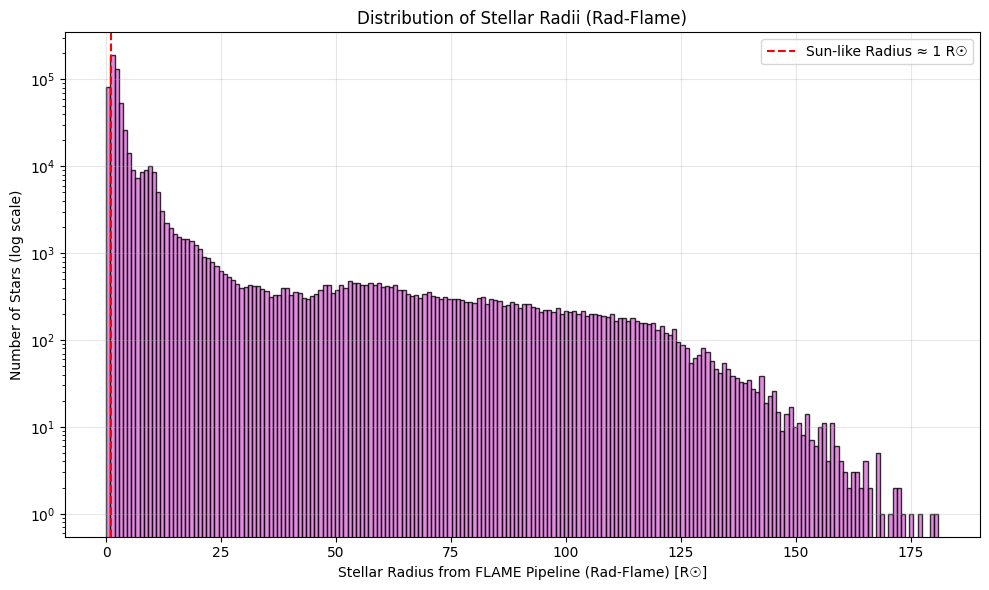

In [141]:
plt.figure(figsize=(10,6))
plt.hist(Dataframe['Rad-Flame'], bins=200, color='orchid', edgecolor='black', alpha=0.8, log=True)
plt.xlabel('Stellar Radius from FLAME Pipeline (Rad-Flame) [R☉]')
plt.ylabel('Number of Stars (log scale)')
plt.title('Distribution of Stellar Radii (Rad-Flame)')
plt.axvline(1, color='red', linestyle='--', label='Sun-like Radius ≈ 1 R☉')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


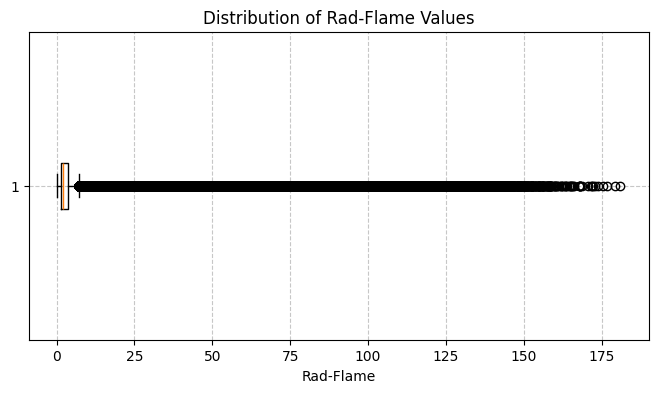

In [142]:
# Boxplot for distribution
plt.figure(figsize=(8, 4))
plt.boxplot(Dataframe['Rad-Flame'].dropna(), vert=False)
plt.title("Distribution of Rad-Flame Values")
plt.xlabel("Rad-Flame")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Consideration for Poppy Universe:**  
`Rad-Flame` provides information about stellar sizes. With only 2.35% missing values and expected duplicates, it can be safely used in the Poppy Universe recommendation engine. For simplicity and user-friendliness, radii could be categorized into broad groups like “small,” “medium,” and “large” rather than using precise values, making it easier to recommend stars based on size.

### 2.27) `EWHa`, `f_EWHa`, `e_EWHa` → emission line measurements  
**Definition:**  
`EWHa`, `f_EWHa`, and `e_EWHa` are variables related to **H-alpha emission line measurements** in stars:  
- `EWHa` – Equivalent width of the H-alpha line, indicating the strength of emission or absorption.  
- `f_EWHa` – Flux corresponding to the H-alpha equivalent width.  
- `e_EWHa` – Measurement error or uncertainty associated with the H-alpha line.  

These parameters are used to study stellar activity, chromospheric emission, or accretion processes.  

**Poppy Universe Consideration:**  
For the Poppy Universe recommendation engine, detailed H-alpha measurements may not be crucial for general star recommendations. They could be simplified into broad categories, such as “active,” “moderate,” or “inactive,” or even omitted if activity information is not essential, keeping recommendations user-friendly.


In [143]:
# Missing Values
extinction_columns = ['EWHa', 'f_EWHa', 'e_EWHa']

for col in extinction_columns:
    missing_values = Dataframe[col].isnull().sum()
    total_values = len(Dataframe[col])
    percent_missing = (missing_values / total_values) * 100
    print(f"Missing values in '{col}': {missing_values}")
    print(f"Percentage of missing values: {percent_missing:.5f}%\n")


Missing values in 'EWHa': 0
Percentage of missing values: 0.00000%

Missing values in 'f_EWHa': 0
Percentage of missing values: 0.00000%

Missing values in 'e_EWHa': 0
Percentage of missing values: 0.00000%



In [144]:
for col in extinction_columns:
    # describtion 
    print(Dataframe[col].describe(), "\n")

count    626016.000000
mean          0.158441
std           0.227429
min          -6.651180
25%           0.045490
50%           0.147890
75%           0.301950
max           1.883830
Name: EWHa, dtype: float64 

count    626016.000000
mean          0.211773
std           0.408565
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: f_EWHa, dtype: float64 

count    626016.000000
mean          0.037198
std           0.040021
min           0.005400
25%           0.018830
50%           0.027910
75%           0.039490
max           3.296320
Name: e_EWHa, dtype: float64 



In [145]:
# Duplicates
for col in extinction_columns:
    duplicates = Dataframe[col].duplicated().sum()
    print(f"Number of duplicate entries in '{col}': {duplicates}")

Number of duplicate entries in 'EWHa': 533230
Number of duplicate entries in 'f_EWHa': 626014
Number of duplicate entries in 'e_EWHa': 603018


We checked for duplicate H-alpha emission line values (`EWHa`, `f_EWHa`, `e_EWHa`). Duplicates are expected—many stars can share similar emission line properties. Repeated values do not indicate duplicate stars and can be handled in the Poppy Universe recommendation engine, potentially by simplifying the measurements into broad activity categories for easier user interpretation.

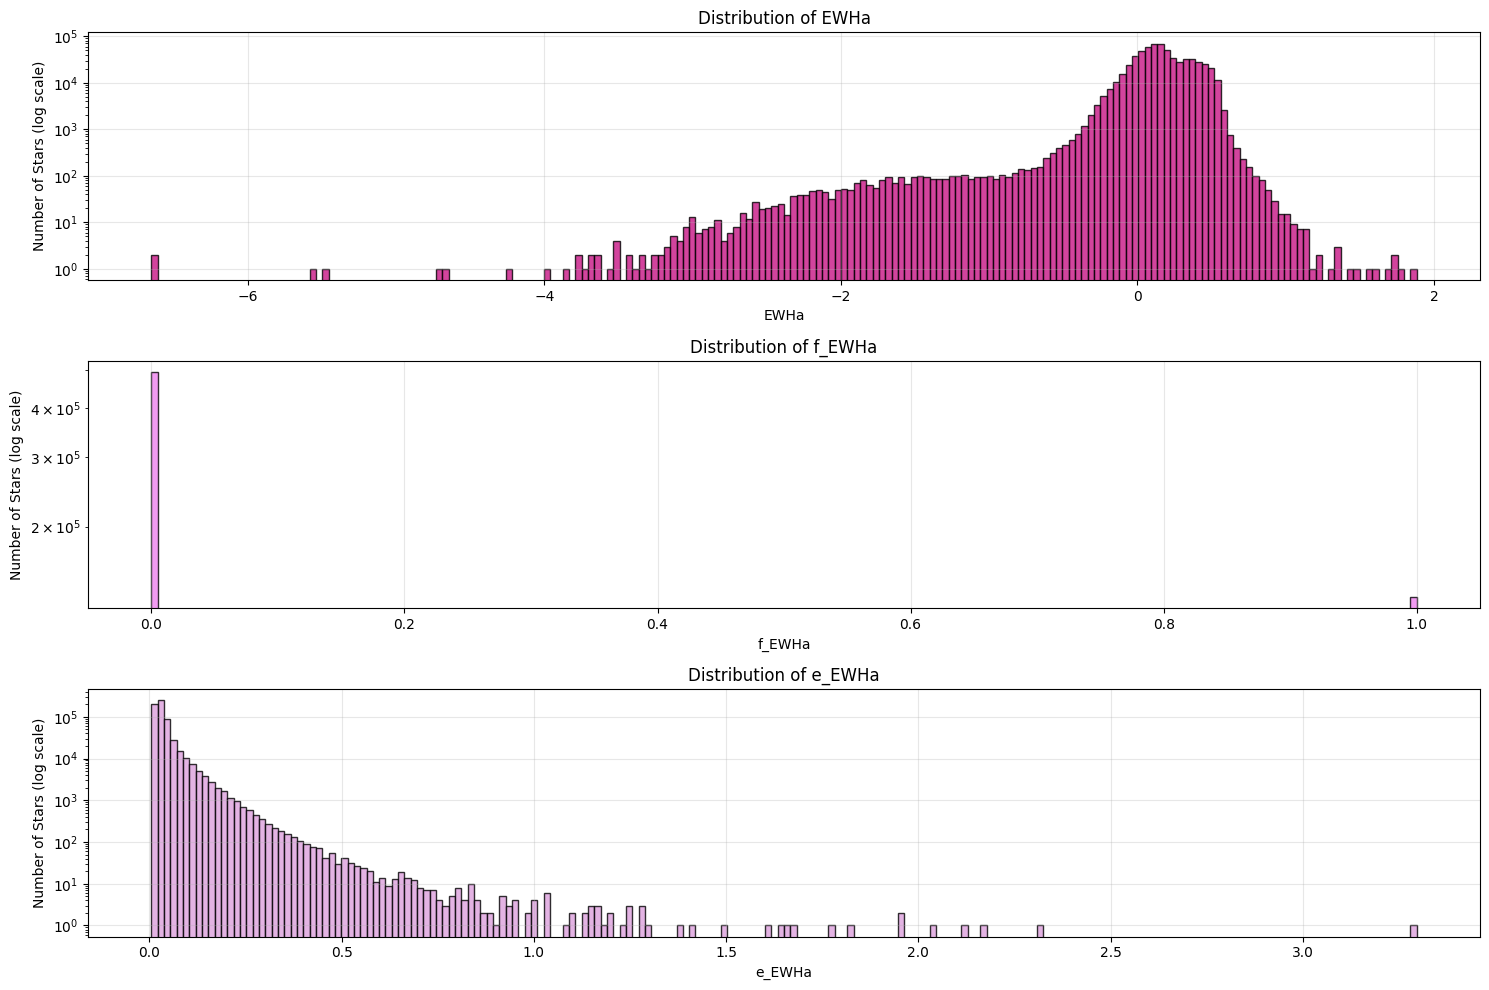

In [146]:
plt.figure(figsize=(15,10))

ewha_columns = ['EWHa', 'f_EWHa', 'e_EWHa']
colors_emission = ['mediumvioletred', 'violet', 'plum']

for i, col in enumerate(ewha_columns):
    plt.subplot(3, 1, i+1)
    plt.hist(Dataframe[col], bins=200, color=colors_emission[i], edgecolor='black', alpha=0.8, log=True)
    plt.xlabel(f'{col}')
    plt.ylabel('Number of Stars (log scale)')
    plt.title(f'Distribution of {col}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


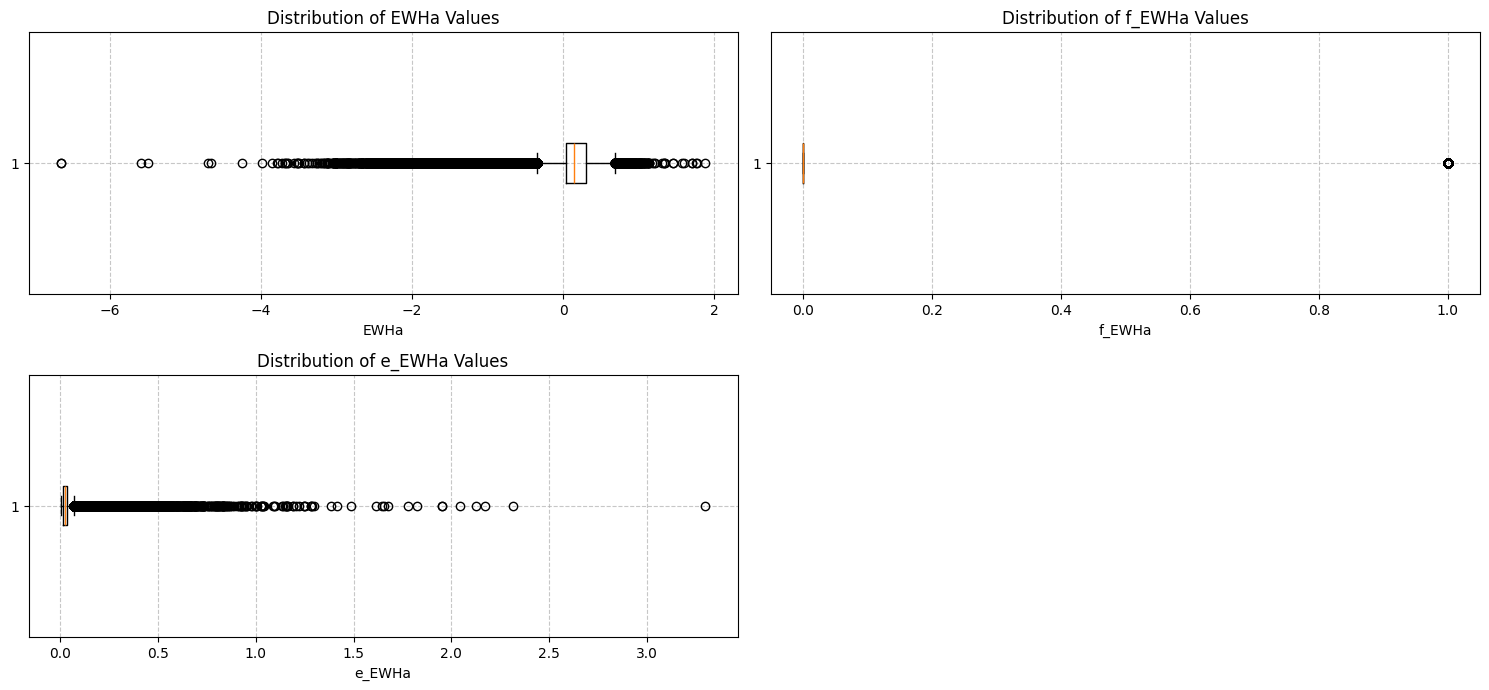

In [147]:
plt.figure(figsize=(15,10))

for i, col in enumerate(extinction_columns):
    plt.subplot(3, 2, i+1)
    # Boxplot for distribution
    plt.boxplot(Dataframe[col].dropna(), vert=False)
    plt.title(f"Distribution of {col} Values")
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Consideration for Poppy Universe:**  
The H-alpha emission line measurements (`EWHa`, `f_EWHa`, `e_EWHa`) show expected duplicates, which is normal for stars with similar activity levels. While these parameters provide detailed information about stellar activity, they may not be essential for general star recommendations. In the Poppy Universe recommendation engine, these values could be simplified into broad activity categories such as “active,” “moderate,” or “inactive,” ensuring recommendations remain intuitive and user-friendly.

In [148]:
reconsider_end = time.time()
reconsider_elapsed = reconsider_end - reconsider_start

---
### Variables to Drop / Ignore (Technical / redundant / non-essential)
---

In [149]:
# =============================
# 🗑️ Drop / Ignore section
# =============================
drop_start = time.time()

### 3.28) `Unnamed: 0` → old CSV index  
  Not included because it is an artifact from the original CSV and does not provide meaningful information for star recommendations.

### 3.29) `e_RA_ICRS`, `e_DE_ICRS`, `e_Plx`, `e_pmRA`, `e_pmDE` → measurement errors  
  Not included because the recommendation engine focuses on stellar properties, not the precision of their measurements.

### 3.30) `e_Gmag`, `e_BPmag`, `e_RPmag`, `e_GRVSmag` → magnitude errors  
  Not included as users do not need to see observational uncertainties; the engine uses corrected or nominal values for brightness.

### 3.31) `PQSO`, `PGal`, `Pstar`, `PWD`, `Pbin` → classification probabilities  
  Not included because the engine uses definitive star classifications rather than probabilistic estimates, simplifying recommendations for users.

### 3.32) `Flags-HS` → internal Gaia flags 
  Not included since these flags are technical details irrelevant to general users and do not influence star selection in Poppy Universe.


In [150]:
# --- put your "drop/ignore" code here ---
drop_end = time.time()
drop_elapsed = drop_end - drop_start

---
## Notebook Runtime
---

In [151]:
# =============================
# TOTAL RUNTIME
# =============================
total_end = time.time()
total_elapsed = total_end - total_start

# --- CALCULATE PERCENTAGES ---
prep_pct = (prep_elapsed / total_elapsed) * 100
keep_pct = (keep_elapsed / total_elapsed) * 100
reconsider_pct = (reconsider_elapsed / total_elapsed) * 100
drop_pct = (drop_elapsed / total_elapsed) * 100

# --- PRINT FINAL SUMMARY ---
print("📝 Notebook Runtime Summary")
print(f"🛠️ Preparation: {prep_elapsed:.2f} sec ({prep_pct:.2f}%)")
print(f"✅ Keep section: {keep_elapsed:.2f} sec ({keep_pct:.2f}%)")
print(f"⚠️ Reconsider section: {reconsider_elapsed:.2f} sec ({reconsider_pct:.2f}%)")
print(f"🗑️ Drop/Ignore section: {drop_elapsed:.2f} sec ({drop_pct:.2f}%)")
print(f"⏱️ Total runtime: {total_elapsed:.2f} sec")
print(f"🕒 Finished at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📝 Notebook Runtime Summary
🛠️ Preparation: 3.95 sec (10.87%)
✅ Keep section: 24.12 sec (66.46%)
⚠️ Reconsider section: 8.17 sec (22.52%)
🗑️ Drop/Ignore section: 0.01 sec (0.02%)
⏱️ Total runtime: 36.29 sec
🕒 Finished at: 2025-11-09 15:00:54
